In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from climate.core import EPW
from climate.helpers import *
a = EPW("./tests/weatherfile.epw")
a.read()

In [3]:
# Run gendaymtx and create diffuse and direct sky matrices
a.run_gendaymtx(reinhart=False)

WEA file created: C:\Users\trist\github\climate\tests\weatherfile.wea
Diffuse radiation matrix created: C:\Users\trist\github\climate\tests\weatherfile.diffmtx
Direct radiation matrix created: C:\Users\trist\github\climate\tests\weatherfile.dirmtx


<BarContainer object of 36 artists>

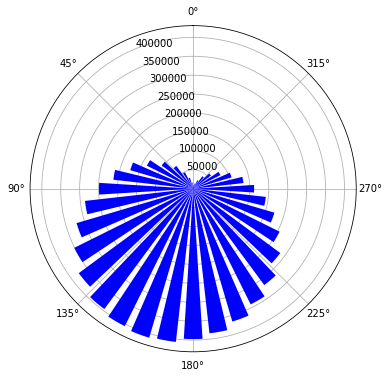

In [9]:
a.total_sky_radiation_rose_values

fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': "polar"})
ax.set_theta_zero_location("N")
ax.set_theta_direction(1)
ax.bar(
    a.radiation_rose_angles, 
    a.direct_sky_radiation_rose_values, 
    width=(np.pi * 2 / 36)-0.05, zorder=5, bottom=0.0, color="b", alpha=1)

In [52]:
import math
def calRadRoseRes(tiltedRoseVectors, TregenzaPatchesNormalVectors, genCumSkyResult, testPoint = np.array([0, 0, 0]), bldgMesh = [], groundRef = 0):
        radResult = []; sunUpHours = 1
        for vec in tiltedRoseVectors:
            radiation = 0; groundRadiation = 0; patchNum = 0;
            for patchVec in TregenzaPatchesNormalVectors:
                vecAngle = angle_between(patchVec, vec, degrees=True)
                
                if  vecAngle < 90:
                    check = 1
                                        
                    if check == 1:
                        radiation = radiation + genCumSkyResult[patchNum] * math.cos(math.radians(vecAngle))
                        groundRadiation = groundRadiation + genCumSkyResult[patchNum] * math.cos(math.radians(vecAngle)) * (groundRef/100) * 0.5
                patchNum += 1
            radResult.append((groundRadiation + radiation)/sunUpHours)
        return radResult

<BarContainer object of 36 artists>

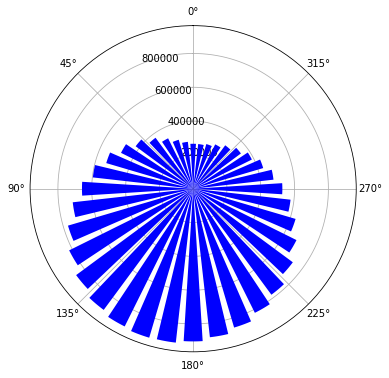

In [55]:
# Ladybug method for radiaiton rose creation
numOfArrows = 36
roseAngles = np.arange(0, 360, (360 / numOfArrows))
surfaceTiltAngle = 90
zVector = (0,0,1)
tiltedRoseVectors = a.radiation_rose_vectors



cenPt = np.array([0, 0, 0])
# patchesNormalVectors = a.tregenza_sky_dome["patch_vectors"]
patchesNormalVectors = a.reinhart_sky_dome["patch_vectors"]

res_rose = calRadRoseRes(tiltedRoseVectors, patchesNormalVectors, a.total_sky_matrix.sum(axis=0))

fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': "polar"})
ax.set_theta_zero_location("N")
ax.set_theta_direction(1)
ax.bar(
    np.radians(np.linspace(0, 350, 36)), 
    res_rose, 
    width=(np.pi * 2 / 36)-0.05, zorder=5, bottom=0.0, color="b", alpha=1)

In [27]:
# For each angle in radiation rose, get the angle between patch normal and vector
cumulative_patch_values = a.direct_sky_matrix.sum(axis=0)
l = []
for rose_vector in a.radiation_rose_vectors:
    ll = []
    for n, patch_vector in enumerate(a.tregenza_sky_dome["patch_vectors"]):
        patch_angle = angle_between(patch_vector, rose_vector, degrees=True)
        patch_value = cumulative_patch_values[n]
        patch_factor = np.cos(patch_angle)
        print(patch_angle, patch_value, patch_factor)
#         ll.append(a.direct_sky_matrixangle_between(patch_vector, rose_vector, degrees=False))
#     l.append(ll)
# l = np.array(l)
# l

5.999972975483512 0.0 0.960162735231011
13.396709143472988 0.0 0.6746259101518782
24.695472599019364 0.0 0.9059116852831186
36.42977981161308 0.0 0.29691878410010664
48.28199492355339 0.0 -0.4010760435821845
60.181038809969934 0.0 -0.8819662600319382
72.10197031111366 381.655135844101 -0.9880638517642566
84.03298039218933 365.728144917349 -0.7038302171226277
95.96701960781068 243.79582961894403 -0.14789910130683118
107.89802968888635 326.606515465215 0.46790329989250684
119.81896119003007 550.7161209807161 0.9054148774937568
131.71800507644662 995.749585466986 0.9739196728244592
143.57022018838694 1439.6639454398662 0.5873288079583777
155.30452740098065 1278.5416351606882 -0.20289053293698667
166.60329085652702 1450.20704212399 -0.9951153332649751
174.0000270245165 1177.50696371524 -0.35074380564897284
166.60329085652702 1696.753169060666 -0.9951153332649751
155.30452740098065 3524.6884658996714 -0.20289053293698667
143.57022018838694 5447.904408098546 0.5873288079583777
131.7180050764

89.99999788717236 0.0 -0.4480717272673052
100.37307742785428 0.0 0.9875616420506078
100.37307943651315 0.0 0.9875619578747138
90.00000211282764 0.0 -0.4480755049890349
79.62692257214573 0.0 -0.4650491191323671
90.0 0.0 -0.4480736161291701
40.372613728630625 0.0 -0.8924313276847937
52.2448315197546 0.0 -0.3972815946014253
64.15295808813744 0.0 0.24710485433557813
76.07823301650829 0.0 0.7775668518560438
88.01096983502164 0.0 0.9989248476136066
99.94465195184203 0.0 0.832986350114085
111.87326254667816 381.655135844101 0.33981797119852186
123.78854752002597 365.728144917349 -0.2996848429093105
135.67593364979882 243.79582961894403 -0.8323569485132949
147.5011556830817 326.606515465215 -0.9882115376161484
159.154757867217 550.7161209807161 -0.48321996762721764
170.01173666751717 995.749585466986 0.9338617327715185
172.7929731127394 1439.6639454398662 -0.999985543081498
162.93954260018026 1278.5416351606882 0.9117484717454358
151.4153152708105 1450.20704212399 0.8145357257434138
139.627386

113.9999902125316 570.5874364651199 0.6195282955002854
110.62463327323434 8847.03482507448 -0.7845102307588409
101.73401248605686 13681.44972200664 0.3595156206813217
90.0000083470354 8497.62915842592 -0.44808107833536304
78.26599838812794 849.54564757296 -0.9627455068026235
69.37532918556744 0.0 0.9663151765533426
66.0000097874684 0.0 -0.9996471960498886
69.37536672676566 0.0 0.9663055142105611
84.03298212726614 0.0 -0.703831449665013
95.96701427280006 0.0 -0.14789382496611927
102.00000899192129 0.0 0.10157675828830844
95.96701787273388 0.0 -0.1478973853113864
84.03298572719996 0.0 -0.7038340069346798
77.99999100807872 0.0 -0.8577984715564949
90.0 0.0 -0.4480736161291701
70.1141977912099 0.0 0.5410094451142387
82.04412676257802 0.0 0.9349359683890727
93.97802543708139 0.0 0.9638364376696181
105.91000935073525 0.0 0.618360992299878
117.83325075042433 0.0 0.023524070634135606
129.73712812071776 0.0 -0.5963665605773104
141.6000663778561 381.655135844101 -0.9740305994751379
153.3636959108

58.29925451746159 0.0 -0.1788233814872625
68.18739882718849 0.0 0.5997244974074366
78.91062914101245 0.0 -0.9320331161878033
90.0 0.0 -0.4480736161291701
101.59743494286843 0.0 0.4832177244811608
112.19877217707517 0.0 0.6227346913103051
120.59970150428559 0.0 0.344415065157046
125.37005996567723 0.0 0.9571948754012796
125.37005996567723 767.1229661878401 0.9571948754012796
120.59970150428559 14936.11285935856 0.344415065157046
112.19877217707517 27085.24032488361 0.6227346913103051
101.59743494286843 23242.9113879136 0.4832177244811608
90.0 24767.064500069202 -0.4480736161291701
78.40256505713158 27355.75921897368 -0.9905958195550426
67.80122782292484 30525.41519970064 0.2541664674967429
59.40029849571441 13633.581436591441 -0.9582547631662529
54.62994003432278 1597.8225500136 -0.3409538920887076
54.62994003432278 0.0 -0.3409538920887076
59.40029849571441 0.0 -0.9582547631662529
67.80122782292484 0.0 0.2541664674967429
78.40256505713158 0.0 -0.9905958195550426
90.0 0.0 -0.448073616129

94.05012678562933 0.0 0.9805301899709346
97.68016985012255 0.0 -0.958015498441233
101.81505215116621 0.0 0.282797188483572
94.07774466460894 0.0 0.9855788545546736
82.31983014987745 0.0 0.8030376358972637
78.1849478488338 0.0 -0.937692192003355
85.92225533539107 0.0 -0.45426111337306807
90.0 0.0 -0.4480736161291701
139.62738627136937 0.0 0.17261786380508903
151.41531527081048 0.0 0.8145357257434304
162.93954260018023 0.0 0.9117484717454242
172.79297311273928 0.0 -0.9999855430814987
170.01173666751717 0.0 0.9338617327715185
159.154757867217 0.0 -0.48321996762721764
147.5011556830817 381.655135844101 -0.9882115376161484
135.67593364979882 365.728144917349 -0.8323569485132949
123.78854752002597 243.79582961894403 -0.2996848429093105
111.87326254667818 326.606515465215 0.33981797119853524
99.94465195184205 550.7161209807161 0.8329863501140928
88.01096983502165 995.749585466986 0.9989248476136059
76.0782330165083 1439.6639454398662 0.7775668518560349
64.15295808813747 1278.5416351606882 0.2

117.83322414027855 381.655135844101 0.023497467843834354
105.91002723602706 365.728144917349 0.6183750481479569
93.97804479511774 243.79582961894403 0.9638415962993511
82.04412649824087 326.606515465215 0.9349360621802159
70.11418878963134 550.7161209807161 0.5410170155685611
58.19592775583291 995.749585466986 -0.07638917628498287
46.3023214103027 1439.6639454398662 -0.6810736442749534
34.46254096763638 1278.5416351606882 -0.9954929583326898
22.764278475362634 1450.20704212399 -0.7157283228995468
11.646163645633296 1177.50696371524 0.6056554790155614
6.323379711413153 1696.753169060666 0.9991923136837757
15.207863052683022 3524.6884658996714 -0.877534511725777
26.636287287871067 5447.904408098546 0.0671995881104545
38.39996034581701 4309.62358164992 0.7642952915509429
50.26285380752425 3023.733740783607 0.9999965451018084
62.16677585972146 3300.4882869449543 0.7868691383671259
74.08997276397295 2647.0923673391844 0.259539569921129
86.02195520488226 2940.744520754266 -0.3633328807848883

76.07825074083627 365.728144917349 0.7775557066715312
64.15297728894836 243.79582961894403 0.24708624892031766
52.244831039928336 326.606515465215 -0.3972811542663756
40.37260493063558 550.7161209807161 -0.8924273581422546
28.584710873204415 995.749585466986 -0.9522184978858284
17.060422714213953 1439.6639454398662 -0.21660628797245607
7.207005708120429 1278.5416351606882 0.6027762257520265
9.98824265586461 1450.20704212399 -0.8454096312133018
20.84525039764959 1177.50696371524 -0.41222798968680535
32.49884506540201 1696.753169060666 0.46875234060481064
44.32404736580096 3524.6884658996714 0.9421695475856541
56.21143492247634 5447.904408098546 0.9436738663683176
68.12676424107042 4309.62358164992 0.550131908248577
80.0553299101012 3023.733740783607 -0.05525460170297453
91.98905691315082 3300.4882869449543 -0.6349365342184784
103.92174925916375 2647.0923673391844 -0.9691120840836561
115.84702271105165 2940.744520754266 -0.9241829429132508
127.75516896007167 3038.5255155755704 -0.4974584

101.59745842033797 0.0 0.4831971698183026
90.00001715835906 0.0 -0.44808895557896083
78.40255964523095 0.0 -0.9905950790801408
67.80124266006536 0.0 0.2541808173648029
59.400305208036464 767.1229661878401 -0.9582566823031753
54.62990351012956 14936.11285935856 -0.3409882275255633
54.62991017497208 27085.24032488361 -0.34098196211570125
59.400325402482004 23242.9113879136 -0.9582624558876728
67.80122635448309 24767.064500069202 0.25416504727762923
78.40254157966204 27355.75921897368 -0.9905926070766493
89.99998284164096 30525.41519970064 -0.44805827654747515
101.59744035476905 13633.581436591441 0.48321298635391785
112.19875733993464 1597.8225500136 0.6227230821723946
120.59969479196356 0.0 0.34442136679455104
125.37009648987045 0.0 0.9572054464803221
125.37008982502793 0.0 0.957203517591767
120.599674597518 0.0 0.3444403255761411
105.15585476961638 0.0 -0.0873875180754624
94.05012678562933 0.0 0.9805301899709346
82.00352315389651 0.0 0.948568252975258
71.84560371394788 0.0 -0.916710840

65.35998583658507 0.0 -0.8176610581616758
54.159628032861534 0.0 -0.729946315933133
43.234888991268626 177.833807970336 0.7334531085793157
32.88808623017336 2350.9707200561943 0.0984767679614427
23.905596078829706 7319.061148105416 0.3369270256846775
18.424710182074318 4149.291867031482 0.9111023269387136
19.64379093613128 4609.472490536041 0.7008306563242354
26.657960209797466 3800.966116954596 0.04556156776014576
36.24058228570075 5303.466827393527 0.11203108615980702
46.83255778292704 7764.436445824651 -0.9578621311831959
57.87118661268236 8896.208950299908 0.24573462079002084
69.12856540948975 9865.81287577254 0.9999085111178025
80.49409584819814 10515.376660643844 0.37415292039344383
91.9020850083628 12711.251245111322 -0.6996433954862777
103.30189630866326 13282.31024181948 -0.9320880200384443
114.64001416341493 11365.684322921586 0.028113987762613504
125.84037196713847 9641.203666024237 0.9844351393117455
136.7651110087314 11987.967314965812 0.10563313580433398
147.1119137698266

61.46573849701599 18341.55669169432 0.20325556541572248
71.69552793915643 19202.790034118327 -0.8466686476621298
82.58556287895624 18740.46160958668 0.618350764381649
93.71361397088938 14996.237293877955 0.860693722381175
104.7244365498361 16869.292252825013 -0.4959402984127611
115.22982440169542 20241.585604768494 -0.5326194543567736
124.700139194603 18837.7596585061 0.5705943292531226
132.33916296412798 17525.663621836542 0.9240430713776393
137.04208311920127 28398.352904290186 0.3735217664773312
137.7584110438756 22526.139075323706 0.8908126726102098
134.29298049337774 4099.775839092596 -0.6999251676996461
127.49907126676084 0.0 -0.26149309242756347
118.53426150298402 0.0 0.6627888113985216
108.30447206084355 0.0 0.0803876554077956
97.41443712104378 0.0 -0.9996858928478625
86.28638602911062 0.0 -0.10720552262181336
78.40254913614895 0.0 -0.9905936411084405
67.80124479504207 0.0 0.2541828822212868
59.40029776345801 0.0 -0.9582545538023686
54.62991092838349 0.0 -0.3409812538562655
54.

137.65256264255265 1450.20704212399 0.8378223882676687
149.46074947790365 1177.50696371524 0.232938711293699
161.05782488619695 1696.753169060666 -0.6699910813917342
171.5224866164277 3524.6884658996714 -0.3009483931290181
171.5225125118006 5447.904408098546 -0.30097308790260424
161.05779971264684 4309.62358164992 -0.6700097692463753
149.4607581108091 3023.733740783607 0.2329471067114877
137.6525632315829 3300.4882869449543 0.8378227098443963
125.77229629664065 2647.0923673391844 0.9941098806807426
113.86032439671389 2940.744520754266 0.7227736813053777
101.9333106952666 3038.5255155755704 0.16765502872751548
89.99999092943136 1175.283124512951 -0.4480655070526387
78.06671607692914 0.0 -0.8901599392256487
66.13965795160311 0.0 -0.9862185196461578
54.22768458952455 0.0 -0.6817754629427147
42.34743735744736 0.0 -0.06401965423226934
34.54923723570252 0.0 -0.9999657048167783
25.242822020954844 0.0 0.9939472254782956
18.942191826630527 0.0 0.9957123620252392
18.94219722888637 0.0 0.99571186

In [16]:
rose_vectors = np.array([[0.0, 1.0, 0.0], [-0.17364817766693033, 0.98480775301220802, 0.0], [-0.34202014332566871, 0.93969262078590843, 0.0], [-0.49999999999999994, 0.86602540378443871, 0.0], [-0.64278760968653925, 0.76604444311897801, 0.0], [-0.76604444311897801, 0.64278760968653936, 0.0], [-0.8660254037844386, 0.50000000000000011, 0.0], [-0.93969262078590832, 0.34202014332566882, 0.0], [-0.98480775301220802, 0.17364817766693041, 0.0], [-1.0, 0.0, 0.0], [-0.98480775301220802, -0.1736481776669303, 0.0], [-0.93969262078590843, -0.34202014332566871, 0.0], [-0.86602540378443871, -0.49999999999999978, 0.0], [-0.76604444311897801, -0.64278760968653936, 0.0], [-0.64278760968653947, -0.7660444431189779, 0.0], [-0.49999999999999994, -0.86602540378443871, 0.0], [-0.34202014332566888, -0.93969262078590832, 0.0], [-0.17364817766693028, -0.98480775301220802, 0.0], [0.0, -1.0, 0.0], [0.17364817766693047, -0.98480775301220802, 0.0], [0.34202014332566866, -0.93969262078590843, 0.0], [0.50000000000000011, -0.8660254037844386, 0.0], [0.64278760968653925, -0.76604444311897801, 0.0], [0.7660444431189779, -0.64278760968653947, 0.0], [0.86602540378443837, -0.50000000000000044, 0.0], [0.93969262078590821, -0.34202014332566938, 0.0], [0.98480775301220802, -0.17364817766693033, 0.0], [1.0, 0.0, 0.0], [0.98480775301220813, 0.17364817766692997, 0.0], [0.93969262078590854, 0.34202014332566816, 0.0], [0.8660254037844386, 0.50000000000000011, 0.0], [0.76604444311897812, 0.64278760968653925, 0.0], [0.64278760968653958, 0.76604444311897779, 0.0], [0.50000000000000044, 0.86602540378443837, 0.0], [0.3420201433256686, 0.93969262078590843, 0.0], [0.17364817766693127, 0.98480775301220791, 0.0]])
tregenza_patches_normal_vectors = np.array([[0.0, 0.99452200000000002, 0.104528], [0.20677300000000001, 0.97278900000000001, 0.104528], [0.40450799999999998, 0.90854100000000004, 0.104528], [0.584565, 0.80458499999999999, 0.104528], [0.73907400000000001, 0.66546499999999997, 0.104528], [0.86128099999999996, 0.49726100000000001, 0.104528], [0.94584699999999999, 0.30732399999999999, 0.104528], [0.98907400000000001, 0.10395600000000001, 0.104528], [0.98907400000000001, -0.10395600000000001, 0.104528], [0.94584699999999999, -0.30732399999999999, 0.104528], [0.86128099999999996, -0.49726100000000001, 0.104528], [0.73907400000000001, -0.66546499999999997, 0.104528], [0.584565, -0.80458499999999999, 0.104528], [0.40450799999999998, -0.90854100000000004, 0.104528], [0.20677300000000001, -0.97278900000000001, 0.104528], [0.0, -0.99452200000000002, 0.104528], [-0.20677300000000001, -0.97278900000000001, 0.104528], [-0.40450799999999998, -0.90854100000000004, 0.104528], [-0.584565, -0.80458499999999999, 0.104528], [-0.73907400000000001, -0.66546499999999997, 0.104528], [-0.86128099999999996, -0.49726100000000001, 0.104528], [-0.94584699999999999, -0.30732399999999999, 0.104528], [-0.98907400000000001, -0.10395600000000001, 0.104528], [-0.98907400000000001, 0.10395600000000001, 0.104528], [-0.94584699999999999, 0.30732399999999999, 0.104528], [-0.86128099999999996, 0.49726100000000001, 0.104528], [-0.73907400000000001, 0.66546499999999997, 0.104528], [-0.584565, 0.80458499999999999, 0.104528], [-0.40450799999999998, 0.90854100000000004, 0.104528], [-0.20677300000000001, 0.97278900000000001, 0.104528], [0.0, 0.95105700000000004, 0.30901699999999999], [0.197736, 0.93027400000000005, 0.30901699999999999], [0.38683000000000001, 0.86883299999999997, 0.30901699999999999], [0.55901699999999999, 0.76942100000000002, 0.30901699999999999], [0.70677299999999998, 0.63638099999999997, 0.30901699999999999], [0.82363900000000001, 0.47552800000000001, 0.30901699999999999], [0.90450799999999998, 0.29389300000000002, 0.30901699999999999], [0.94584699999999999, 0.099412, 0.30901699999999999], [0.94584699999999999, -0.099412, 0.30901699999999999], [0.90450799999999998, -0.29389300000000002, 0.30901699999999999], [0.82363900000000001, -0.47552800000000001, 0.30901699999999999], [0.70677299999999998, -0.63638099999999997, 0.30901699999999999], [0.55901699999999999, -0.76942100000000002, 0.30901699999999999], [0.38683000000000001, -0.86883299999999997, 0.30901699999999999], [0.197736, -0.93027400000000005, 0.30901699999999999], [0.0, -0.95105700000000004, 0.30901699999999999], [-0.197736, -0.93027400000000005, 0.30901699999999999], [-0.38683000000000001, -0.86883299999999997, 0.30901699999999999], [-0.55901699999999999, -0.76942100000000002, 0.30901699999999999], [-0.70677299999999998, -0.63638099999999997, 0.30901699999999999], [-0.82363900000000001, -0.47552800000000001, 0.30901699999999999], [-0.90450799999999998, -0.29389300000000002, 0.30901699999999999], [-0.94584699999999999, -0.099412, 0.30901699999999999], [-0.94584699999999999, 0.099412, 0.30901699999999999], [-0.90450799999999998, 0.29389300000000002, 0.30901699999999999], [-0.82363900000000001, 0.47552800000000001, 0.30901699999999999], [-0.70677299999999998, 0.63638099999999997, 0.30901699999999999], [-0.55901699999999999, 0.76942100000000002, 0.30901699999999999], [-0.38683000000000001, 0.86883299999999997, 0.30901699999999999], [-0.197736, 0.93027400000000005, 0.30901699999999999], [0.0, 0.86602500000000004, 0.5], [0.22414400000000001, 0.83651600000000004, 0.5], [0.43301299999999998, 0.75, 0.5], [0.61237200000000003, 0.61237200000000003, 0.5], [0.75, 0.43301299999999998, 0.5], [0.83651600000000004, 0.22414400000000001, 0.5], [0.86602500000000004, 0.0, 0.5], [0.83651600000000004, -0.22414400000000001, 0.5], [0.75, -0.43301299999999998, 0.5], [0.61237200000000003, -0.61237200000000003, 0.5], [0.43301299999999998, -0.75, 0.5], [0.22414400000000001, -0.83651600000000004, 0.5], [0.0, -0.86602500000000004, 0.5], [-0.22414400000000001, -0.83651600000000004, 0.5], [-0.43301299999999998, -0.75, 0.5], [-0.61237200000000003, -0.61237200000000003, 0.5], [-0.75, -0.43301299999999998, 0.5], [-0.83651600000000004, -0.22414400000000001, 0.5], [-0.86602500000000004, 0.0, 0.5], [-0.83651600000000004, 0.22414400000000001, 0.5], [-0.75, 0.43301299999999998, 0.5], [-0.61237200000000003, 0.61237200000000003, 0.5], [-0.43301299999999998, 0.75, 0.5], [-0.22414400000000001, 0.83651600000000004, 0.5], [0.0, 0.74314499999999994, 0.66913100000000003], [0.19234000000000001, 0.71782299999999999, 0.66913100000000003], [0.37157200000000001, 0.64358199999999999, 0.66913100000000003], [0.52548300000000003, 0.52548300000000003, 0.66913100000000003], [0.64358199999999999, 0.37157200000000001, 0.66913100000000003], [0.71782299999999999, 0.19234000000000001, 0.66913100000000003], [0.74314499999999994, 0.0, 0.66913100000000003], [0.71782299999999999, -0.19234000000000001, 0.66913100000000003], [0.64358199999999999, -0.37157200000000001, 0.66913100000000003], [0.52548300000000003, -0.52548300000000003, 0.66913100000000003], [0.37157200000000001, -0.64358199999999999, 0.66913100000000003], [0.19234000000000001, -0.71782299999999999, 0.66913100000000003], [0.0, -0.74314499999999994, 0.66913100000000003], [-0.19234000000000001, -0.71782299999999999, 0.66913100000000003], [-0.37157200000000001, -0.64358199999999999, 0.66913100000000003], [-0.52548300000000003, -0.52548300000000003, 0.66913100000000003], [-0.64358199999999999, -0.37157200000000001, 0.66913100000000003], [-0.71782299999999999, -0.19234000000000001, 0.66913100000000003], [-0.74314499999999994, 0.0, 0.66913100000000003], [-0.71782299999999999, 0.19234000000000001, 0.66913100000000003], [-0.64358199999999999, 0.37157200000000001, 0.66913100000000003], [-0.52548300000000003, 0.52548300000000003, 0.66913100000000003], [-0.37157200000000001, 0.64358199999999999, 0.66913100000000003], [-0.19234000000000001, 0.71782299999999999, 0.66913100000000003], [0.0, 0.587785, 0.80901699999999999], [0.20103399999999999, 0.55233699999999997, 0.80901699999999999], [0.37782100000000002, 0.45027, 0.80901699999999999], [0.50903699999999996, 0.29389300000000002, 0.80901699999999999], [0.57885500000000001, 0.10206800000000001, 0.80901699999999999], [0.57885500000000001, -0.10206800000000001, 0.80901699999999999], [0.50903699999999996, -0.29389300000000002, 0.80901699999999999], [0.37782100000000002, -0.45027, 0.80901699999999999], [0.20103399999999999, -0.55233699999999997, 0.80901699999999999], [0.0, -0.587785, 0.80901699999999999], [-0.20103399999999999, -0.55233699999999997, 0.80901699999999999], [-0.37782100000000002, -0.45027, 0.80901699999999999], [-0.50903699999999996, -0.29389300000000002, 0.80901699999999999], [-0.57885500000000001, -0.10206800000000001, 0.80901699999999999], [-0.57885500000000001, 0.10206800000000001, 0.80901699999999999], [-0.50903699999999996, 0.29389300000000002, 0.80901699999999999], [-0.37782100000000002, 0.45027, 0.80901699999999999], [-0.20103399999999999, 0.55233699999999997, 0.80901699999999999], [0.0, 0.40673700000000002, 0.91354500000000005], [0.20336799999999999, 0.352244, 0.91354500000000005], [0.352244, 0.20336799999999999, 0.91354500000000005], [0.40673700000000002, 0.0, 0.91354500000000005], [0.352244, -0.20336799999999999, 0.91354500000000005], [0.20336799999999999, -0.352244, 0.91354500000000005], [0.0, -0.40673700000000002, 0.91354500000000005], [-0.20336799999999999, -0.352244, 0.91354500000000005], [-0.352244, -0.20336799999999999, 0.91354500000000005], [-0.40673700000000002, 0.0, 0.91354500000000005], [-0.352244, 0.20336799999999999, 0.91354500000000005], [-0.20336799999999999, 0.352244, 0.91354500000000005], [0.0, 0.20791200000000001, 0.97814800000000002], [0.18005699999999999, 0.10395600000000001, 0.97814800000000002], [0.18005699999999999, -0.10395600000000001, 0.97814800000000002], [0.0, -0.20791200000000001, 0.97814800000000002], [-0.18005699999999999, -0.10395600000000001, 0.97814800000000002], [-0.18005699999999999, 0.10395600000000001, 0.97814800000000002], [0.0, 0.0, 1]])
reinhart_patches_normal_vectors = np.array([[-0.0000000, 0.9985349, 0.0541114], [0.1043753, 0.9930648, 0.0541114], [0.2076071, 0.9767145, 0.0541114], [0.3085643, 0.9496631, 0.0541114], [0.4061407, 0.9122070, 0.0541114], [0.4992675, 0.8647566, 0.0541114], [0.5869241, 0.8078317, 0.0541114], [0.6681503, 0.7420561, 0.0541114], [0.7420561, 0.6681503, 0.0541114], [0.8078317, 0.5869241, 0.0541114], [0.8647566, 0.4992675, 0.0541114], [0.9122070, 0.4061407, 0.0541114], [0.9496631, 0.3085643, 0.0541114], [0.9767145, 0.2076071, 0.0541114], [0.9930648, 0.1043753, 0.0541114], [0.9985349, -0.0000000, 0.0541114], [0.9930648, -0.1043753, 0.0541114], [0.9767145, -0.2076071, 0.0541114], [0.9496631, -0.3085643, 0.0541114], [0.9122070, -0.4061407, 0.0541114], [0.8647566, -0.4992675, 0.0541114], [0.8078317, -0.5869241, 0.0541114], [0.7420561, -0.6681503, 0.0541114], [0.6681503, -0.7420561, 0.0541114], [0.5869241, -0.8078317, 0.0541114], [0.4992675, -0.8647566, 0.0541114], [0.4061407, -0.9122070, 0.0541114], [0.3085643, -0.9496631, 0.0541114], [0.2076071, -0.9767145, 0.0541114], [0.1043753, -0.9930648, 0.0541114], [-0.0000000, -0.9985349, 0.0541114], [-0.1043753, -0.9930648, 0.0541114], [-0.2076071, -0.9767145, 0.0541114], [-0.3085643, -0.9496631, 0.0541114], [-0.4061407, -0.9122070, 0.0541114], [-0.4992675, -0.8647566, 0.0541114], [-0.5869241, -0.8078317, 0.0541114], [-0.6681503, -0.7420561, 0.0541114], [-0.7420561, -0.6681503, 0.0541114], [-0.8078317, -0.5869241, 0.0541114], [-0.8647566, -0.4992675, 0.0541114], [-0.9122070, -0.4061407, 0.0541114], [-0.9496631, -0.3085643, 0.0541114], [-0.9767145, -0.2076071, 0.0541114], [-0.9930648, -0.1043753, 0.0541114], [-0.9985349, 0.0000000, 0.0541114], [-0.9930648, 0.1043753, 0.0541114], [-0.9767145, 0.2076071, 0.0541114], [-0.9496631, 0.3085643, 0.0541114], [-0.9122070, 0.4061407, 0.0541114], [-0.8647566, 0.4992675, 0.0541114], [-0.8078317, 0.5869241, 0.0541114], [-0.7420561, 0.6681503, 0.0541114], [-0.6681503, 0.7420561, 0.0541114], [-0.5869241, 0.8078317, 0.0541114], [-0.4992675, 0.8647566, 0.0541114], [-0.4061407, 0.9122070, 0.0541114], [-0.3085643, 0.9496631, 0.0541114], [-0.2076071, 0.9767145, 0.0541114], [-0.1043753, 0.9930648, 0.0541114], [0.0000000, 0.9868403, 0.1616979], [0.1031529, 0.9814343, 0.1616979], [0.2051756, 0.9652755, 0.1616979], [0.3049504, 0.9385409, 0.1616979], [0.4013841, 0.9015235, 0.1616979], [0.4934202, 0.8546288, 0.1616979], [0.5800502, 0.7983706, 0.1616979], [0.6603250, 0.7333653, 0.1616979], [0.7333653, 0.6603250, 0.1616979], [0.7983706, 0.5800502, 0.1616979], [0.8546288, 0.4934202, 0.1616979], [0.9015235, 0.4013841, 0.1616979], [0.9385409, 0.3049504, 0.1616979], [0.9652755, 0.2051756, 0.1616979], [0.9814343, 0.1031529, 0.1616979], [0.9868403, 0.0000000, 0.1616979], [0.9814343, -0.1031529, 0.1616979], [0.9652755, -0.2051756, 0.1616979], [0.9385409, -0.3049504, 0.1616979], [0.9015235, -0.4013841, 0.1616979], [0.8546288, -0.4934202, 0.1616979], [0.7983706, -0.5800502, 0.1616979], [0.7333653, -0.6603250, 0.1616979], [0.6603250, -0.7333653, 0.1616979], [0.5800502, -0.7983706, 0.1616979], [0.4934202, -0.8546288, 0.1616979], [0.4013841, -0.9015235, 0.1616979], [0.3049504, -0.9385409, 0.1616979], [0.2051756, -0.9652755, 0.1616979], [0.1031529, -0.9814343, 0.1616979], [0.0000000, -0.9868403, 0.1616979], [-0.1031529, -0.9814343, 0.1616979], [-0.2051756, -0.9652755, 0.1616979], [-0.3049504, -0.9385409, 0.1616979], [-0.4013841, -0.9015235, 0.1616979], [-0.4934202, -0.8546288, 0.1616979], [-0.5800502, -0.7983706, 0.1616979], [-0.6603250, -0.7333653, 0.1616979], [-0.7333653, -0.6603250, 0.1616979], [-0.7983706, -0.5800502, 0.1616979], [-0.8546288, -0.4934202, 0.1616979], [-0.9015235, -0.4013841, 0.1616979], [-0.9385409, -0.3049504, 0.1616979], [-0.9652755, -0.2051756, 0.1616979], [-0.9814343, -0.1031529, 0.1616979], [-0.9868403, 0.0000000, 0.1616979], [-0.9814343, 0.1031529, 0.1616979], [-0.9652755, 0.2051756, 0.1616979], [-0.9385409, 0.3049504, 0.1616979], [-0.9015235, 0.4013841, 0.1616979], [-0.8546288, 0.4934202, 0.1616979], [-0.7983706, 0.5800502, 0.1616979], [-0.7333653, 0.6603250, 0.1616979], [-0.6603250, 0.7333653, 0.1616979], [-0.5800502, 0.7983706, 0.1616979], [-0.4934202, 0.8546288, 0.1616979], [-0.4013841, 0.9015235, 0.1616979], [-0.3049504, 0.9385409, 0.1616979], [-0.2051756, 0.9652755, 0.1616979], [-0.1031529, 0.9814343, 0.1616979], [0.0000000, 0.9635902, 0.2673836], [0.1007226, 0.9583115, 0.2673836], [0.2003417, 0.9425334, 0.2673836], [0.2977657, 0.9164287, 0.2673836], [0.3919274, 0.8802834, 0.2673836], [0.4817951, 0.8344936, 0.2673836], [0.5663841, 0.7795608, 0.2673836], [0.6447677, 0.7160871, 0.2673836], [0.7160871, 0.6447677, 0.2673836], [0.7795608, 0.5663841, 0.2673836], [0.8344936, 0.4817951, 0.2673836], [0.8802834, 0.3919274, 0.2673836], [0.9164287, 0.2977657, 0.2673836], [0.9425334, 0.2003417, 0.2673836], [0.9583115, 0.1007226, 0.2673836], [0.9635902, 0.0000000, 0.2673836], [0.9583115, -0.1007226, 0.2673836], [0.9425334, -0.2003417, 0.2673836], [0.9164287, -0.2977657, 0.2673836], [0.8802834, -0.3919274, 0.2673836], [0.8344936, -0.4817951, 0.2673836], [0.7795608, -0.5663841, 0.2673836], [0.7160871, -0.6447677, 0.2673836], [0.6447677, -0.7160871, 0.2673836], [0.5663841, -0.7795608, 0.2673836], [0.4817951, -0.8344936, 0.2673836], [0.3919274, -0.8802834, 0.2673836], [0.2977657, -0.9164287, 0.2673836], [0.2003417, -0.9425334, 0.2673836], [0.1007226, -0.9583115, 0.2673836], [0.0000000, -0.9635902, 0.2673836], [-0.1007226, -0.9583115, 0.2673836], [-0.2003417, -0.9425334, 0.2673836], [-0.2977657, -0.9164287, 0.2673836], [-0.3919274, -0.8802834, 0.2673836], [-0.4817951, -0.8344936, 0.2673836], [-0.5663841, -0.7795608, 0.2673836], [-0.6447677, -0.7160871, 0.2673836], [-0.7160871, -0.6447677, 0.2673836], [-0.7795608, -0.5663841, 0.2673836], [-0.8344936, -0.4817951, 0.2673836], [-0.8802834, -0.3919274, 0.2673836], [-0.9164287, -0.2977657, 0.2673836], [-0.9425334, -0.2003417, 0.2673836], [-0.9583115, -0.1007226, 0.2673836], [-0.9635902, 0.0000000, 0.2673836], [-0.9583115, 0.1007226, 0.2673836], [-0.9425334, 0.2003417, 0.2673836], [-0.9164287, 0.2977657, 0.2673836], [-0.8802834, 0.3919274, 0.2673836], [-0.8344936, 0.4817951, 0.2673836], [-0.7795608, 0.5663841, 0.2673836], [-0.7160871, 0.6447677, 0.2673836], [-0.6447677, 0.7160871, 0.2673836], [-0.5663841, 0.7795608, 0.2673836], [-0.4817951, 0.8344936, 0.2673836], [-0.3919274, 0.8802834, 0.2673836], [-0.2977657, 0.9164287, 0.2673836], [-0.2003417, 0.9425334, 0.2673836], [-0.1007226, 0.9583115, 0.2673836], [0.0000000, 0.9290610, 0.3699264], [0.0971133, 0.9239716, 0.3699264], [0.1931627, 0.9087588, 0.3699264], [0.2870957, 0.8835896, 0.3699264], [0.3778832, 0.8487395, 0.3699264], [0.4645305, 0.8045905, 0.3699264], [0.5460884, 0.7516262, 0.3699264], [0.6216632, 0.6904269, 0.3699264], [0.6904269, 0.6216632, 0.3699264], [0.7516262, 0.5460884, 0.3699264], [0.8045905, 0.4645305, 0.3699264], [0.8487395, 0.3778832, 0.3699264], [0.8835896, 0.2870957, 0.3699264], [0.9087588, 0.1931627, 0.3699264], [0.9239716, 0.0971133, 0.3699264], [0.9290610, 0.0000000, 0.3699264], [0.9239716, -0.0971133, 0.3699264], [0.9087588, -0.1931627, 0.3699264], [0.8835896, -0.2870957, 0.3699264], [0.8487395, -0.3778832, 0.3699264], [0.8045905, -0.4645305, 0.3699264], [0.7516262, -0.5460884, 0.3699264], [0.6904269, -0.6216632, 0.3699264], [0.6216632, -0.6904269, 0.3699264], [0.5460884, -0.7516262, 0.3699264], [0.4645305, -0.8045905, 0.3699264], [0.3778832, -0.8487395, 0.3699264], [0.2870957, -0.8835896, 0.3699264], [0.1931627, -0.9087588, 0.3699264], [0.0971133, -0.9239716, 0.3699264], [0.0000000, -0.9290610, 0.3699264], [-0.0971133, -0.9239716, 0.3699264], [-0.1931627, -0.9087588, 0.3699264], [-0.2870957, -0.8835896, 0.3699264], [-0.3778832, -0.8487395, 0.3699264], [-0.4645305, -0.8045905, 0.3699264], [-0.5460884, -0.7516262, 0.3699264], [-0.6216632, -0.6904269, 0.3699264], [-0.6904269, -0.6216632, 0.3699264], [-0.7516262, -0.5460884, 0.3699264], [-0.8045905, -0.4645305, 0.3699264], [-0.8487395, -0.3778832, 0.3699264], [-0.8835896, -0.2870957, 0.3699264], [-0.9087588, -0.1931627, 0.3699264], [-0.9239716, -0.0971133, 0.3699264], [-0.9290610, 0.0000000, 0.3699264], [-0.9239716, 0.0971133, 0.3699264], [-0.9087588, 0.1931627, 0.3699264], [-0.8835896, 0.2870957, 0.3699264], [-0.8487395, 0.3778832, 0.3699264], [-0.8045905, 0.4645305, 0.3699264], [-0.7516262, 0.5460884, 0.3699264], [-0.6904269, 0.6216632, 0.3699264], [-0.6216632, 0.6904269, 0.3699264], [-0.5460884, 0.7516262, 0.3699264], [-0.4645305, 0.8045905, 0.3699264], [-0.3778832, 0.8487395, 0.3699264], [-0.2870957, 0.8835896, 0.3699264], [-0.1931627, 0.9087588, 0.3699264], [-0.0971133, 0.9239716, 0.3699264], [0.0000000, 0.8836123, 0.4682192], [0.1153345, 0.8760529, 0.4682192], [0.2286957, 0.8535040, 0.4682193], [0.3381438, 0.8163513, 0.4682192], [0.4418062, 0.7652307, 0.4682192], [0.5379091, 0.7010168, 0.4682192], [0.6248083, 0.6248083, 0.4682193], [0.7010168, 0.5379091, 0.4682192], [0.7652307, 0.4418062, 0.4682192], [0.8163513, 0.3381438, 0.4682192], [0.8535040, 0.2286957, 0.4682193], [0.8760529, 0.1153345, 0.4682192], [0.8836123, 0.0000000, 0.4682192], [0.8760529, -0.1153345, 0.4682192], [0.8535040, -0.2286957, 0.4682193], [0.8163513, -0.3381438, 0.4682192], [0.7652307, -0.4418062, 0.4682192], [0.7010168, -0.5379091, 0.4682192], [0.6248083, -0.6248083, 0.4682193], [0.5379091, -0.7010168, 0.4682192], [0.4418062, -0.7652307, 0.4682192], [0.3381438, -0.8163513, 0.4682192], [0.2286957, -0.8535040, 0.4682193], [0.1153345, -0.8760529, 0.4682192], [0.0000000, -0.8836123, 0.4682192], [-0.1153345, -0.8760529, 0.4682192], [-0.2286957, -0.8535040, 0.4682193], [-0.3381438, -0.8163513, 0.4682192], [-0.4418062, -0.7652307, 0.4682192], [-0.5379091, -0.7010168, 0.4682192], [-0.6248083, -0.6248083, 0.4682193], [-0.7010168, -0.5379091, 0.4682192], [-0.7652307, -0.4418062, 0.4682192], [-0.8163513, -0.3381438, 0.4682192], [-0.8535040, -0.2286957, 0.4682193], [-0.8760529, -0.1153345, 0.4682192], [-0.8836123, 0.0000000, 0.4682192], [-0.8760529, 0.1153345, 0.4682192], [-0.8535040, 0.2286957, 0.4682193], [-0.8163513, 0.3381438, 0.4682192], [-0.7652307, 0.4418062, 0.4682192], [-0.7010168, 0.5379091, 0.4682192], [-0.6248083, 0.6248083, 0.4682193], [-0.5379091, 0.7010168, 0.4682192], [-0.4418062, 0.7652307, 0.4682192], [-0.3381438, 0.8163513, 0.4682192], [-0.2286957, 0.8535040, 0.4682193], [-0.1153345, 0.8760529, 0.4682192], [0.0000000, 0.8278694, 0.5609210], [0.1080586, 0.8207868, 0.5609210], [0.2142684, 0.7996604, 0.5609210], [0.3168119, 0.7648516, 0.5609210], [0.4139347, 0.7169559, 0.5609210], [0.5039749, 0.6567929, 0.5609210], [0.5853920, 0.5853920, 0.5609210], [0.6567929, 0.5039749, 0.5609210], [0.7169559, 0.4139347, 0.5609210], [0.7648516, 0.3168119, 0.5609210], [0.7996604, 0.2142684, 0.5609210], [0.8207868, 0.1080586, 0.5609210], [0.8278694, 0.0000000, 0.5609210], [0.8207868, -0.1080586, 0.5609210], [0.7996604, -0.2142684, 0.5609210], [0.7648516, -0.3168119, 0.5609210], [0.7169559, -0.4139347, 0.5609210], [0.6567929, -0.5039749, 0.5609210], [0.5853920, -0.5853920, 0.5609210], [0.5039749, -0.6567929, 0.5609210], [0.4139347, -0.7169559, 0.5609210], [0.3168119, -0.7648516, 0.5609210], [0.2142684, -0.7996604, 0.5609210], [0.1080586, -0.8207868, 0.5609210], [0.0000000, -0.8278694, 0.5609210], [-0.1080586, -0.8207868, 0.5609210], [-0.2142684, -0.7996604, 0.5609210], [-0.3168119, -0.7648516, 0.5609210], [-0.4139347, -0.7169559, 0.5609210], [-0.5039749, -0.6567929, 0.5609210], [-0.5853920, -0.5853920, 0.5609210], [-0.6567929, -0.5039749, 0.5609210], [-0.7169559, -0.4139347, 0.5609210], [-0.7648516, -0.3168119, 0.5609210], [-0.7996604, -0.2142684, 0.5609210], [-0.8207868, -0.1080586, 0.5609210], [-0.8278694, 0.0000000, 0.5609210], [-0.8207868, 0.1080586, 0.5609210], [-0.7996604, 0.2142684, 0.5609210], [-0.7648516, 0.3168119, 0.5609210], [-0.7169559, 0.4139347, 0.5609210], [-0.6567929, 0.5039749, 0.5609210], [-0.5853920, 0.5853920, 0.5609210], [-0.5039749, 0.6567929, 0.5609210], [-0.4139347, 0.7169559, 0.5609210], [-0.3168119, 0.7648516, 0.5609210], [-0.2142684, 0.7996604, 0.5609210], [-0.1080586, 0.8207868, 0.5609210], [0.0000000, 0.7624648, 0.6470297], [0.0995216, 0.7559418, 0.6470297], [0.1973404, 0.7364845, 0.6470297], [0.2917826, 0.7044256, 0.6470297], [0.3812324, 0.6603139, 0.6470297], [0.4641592, 0.6049040, 0.6470297], [0.5391440, 0.5391440, 0.6470297], [0.6049040, 0.4641592, 0.6470297], [0.6603139, 0.3812324, 0.6470297], [0.7044256, 0.2917826, 0.6470297], [0.7364845, 0.1973404, 0.6470297], [0.7559418, 0.0995216, 0.6470297], [0.7624648, 0.0000000, 0.6470297], [0.7559418, -0.0995216, 0.6470297], [0.7364845, -0.1973404, 0.6470297], [0.7044256, -0.2917826, 0.6470297], [0.6603139, -0.3812324, 0.6470297], [0.6049040, -0.4641592, 0.6470297], [0.5391440, -0.5391440, 0.6470297], [0.4641592, -0.6049040, 0.6470297], [0.3812324, -0.6603139, 0.6470297], [0.2917826, -0.7044256, 0.6470297], [0.1973404, -0.7364845, 0.6470297], [0.0995216, -0.7559418, 0.6470297], [0.0000000, -0.7624648, 0.6470297], [-0.0995216, -0.7559418, 0.6470297], [-0.1973404, -0.7364845, 0.6470297], [-0.2917826, -0.7044256, 0.6470297], [-0.3812324, -0.6603139, 0.6470297], [-0.4641592, -0.6049040, 0.6470297], [-0.5391440, -0.5391440, 0.6470297], [-0.6049040, -0.4641592, 0.6470297], [-0.6603139, -0.3812324, 0.6470297], [-0.7044256, -0.2917826, 0.6470297], [-0.7364845, -0.1973404, 0.6470297], [-0.7559418, -0.0995216, 0.6470297], [-0.7624648, 0.0000000, 0.6470297], [-0.7559418, 0.0995216, 0.6470297], [-0.7364845, 0.1973404, 0.6470297], [-0.7044256, 0.2917826, 0.6470297], [-0.6603139, 0.3812324, 0.6470297], [-0.6049040, 0.4641592, 0.6470297], [-0.5391440, 0.5391440, 0.6470297], [-0.4641592, 0.6049040, 0.6470297], [-0.3812324, 0.6603139, 0.6470297], [-0.2917826, 0.7044256, 0.6470297], [-0.1973404, 0.7364845, 0.6470297], [-0.0995216, 0.7559418, 0.6470297], [0.0000000, 0.6881822, 0.7255379], [0.0898258, 0.6822947, 0.7255379], [0.1781147, 0.6647330, 0.7255379], [0.2633559, 0.6357975, 0.7255379], [0.3440911, 0.5959833, 0.7255379], [0.4189388, 0.5459717, 0.7255379], [0.4866183, 0.4866183, 0.7255379], [0.5459717, 0.4189388, 0.7255379], [0.5959833, 0.3440911, 0.7255379], [0.6357975, 0.2633559, 0.7255379], [0.6647330, 0.1781147, 0.7255379], [0.6822947, 0.0898258, 0.7255379], [0.6881822, 0.0000000, 0.7255379], [0.6822947, -0.0898258, 0.7255379], [0.6647330, -0.1781147, 0.7255379], [0.6357975, -0.2633559, 0.7255379], [0.5959833, -0.3440911, 0.7255379], [0.5459717, -0.4189388, 0.7255379], [0.4866183, -0.4866183, 0.7255379], [0.4189388, -0.5459717, 0.7255379], [0.3440911, -0.5959833, 0.7255379], [0.2633559, -0.6357975, 0.7255379], [0.1781147, -0.6647330, 0.7255379], [0.0898258, -0.6822947, 0.7255379], [0.0000000, -0.6881822, 0.7255379], [-0.0898258, -0.6822947, 0.7255379], [-0.1781147, -0.6647330, 0.7255379], [-0.2633559, -0.6357975, 0.7255379], [-0.3440911, -0.5959833, 0.7255379], [-0.4189388, -0.5459717, 0.7255379], [-0.4866183, -0.4866183, 0.7255379], [-0.5459717, -0.4189388, 0.7255379], [-0.5959833, -0.3440911, 0.7255379], [-0.6357975, -0.2633559, 0.7255379], [-0.6647330, -0.1781147, 0.7255379], [-0.6822947, -0.0898258, 0.7255379], [-0.6881822, 0.0000000, 0.7255379], [-0.6822947, 0.0898258, 0.7255379], [-0.6647330, 0.1781147, 0.7255379], [-0.6357975, 0.2633559, 0.7255379], [-0.5959833, 0.3440911, 0.7255379], [-0.5459717, 0.4189388, 0.7255379], [-0.4866183, 0.4866183, 0.7255379], [-0.4189388, 0.5459717, 0.7255379], [-0.3440911, 0.5959833, 0.7255379], [-0.2633559, 0.6357975, 0.7255379], [-0.1781147, 0.6647330, 0.7255379], [-0.0898258, 0.6822947, 0.7255379], [0.0000000, 0.6056963, 0.7956959], [0.1051781, 0.5964944, 0.7956959], [0.2071603, 0.5691683, 0.7956959], [0.3028481, 0.5245484, 0.7956959], [0.3893341, 0.4639903, 0.7956959], [0.4639903, 0.3893341, 0.7956959], [0.5245484, 0.3028481, 0.7956959], [0.5691683, 0.2071603, 0.7956959], [0.5964944, 0.1051781, 0.7956959], [0.6056963, 0.0000000, 0.7956959], [0.5964944, -0.1051781, 0.7956959], [0.5691683, -0.2071603, 0.7956959], [0.5245484, -0.3028481, 0.7956959], [0.4639903, -0.3893341, 0.7956959], [0.3893341, -0.4639903, 0.7956959], [0.3028481, -0.5245484, 0.7956959], [0.2071603, -0.5691683, 0.7956959], [0.1051781, -0.5964944, 0.7956959], [0.0000000, -0.6056963, 0.7956959], [-0.1051781, -0.5964944, 0.7956959], [-0.2071603, -0.5691683, 0.7956959], [-0.3028481, -0.5245484, 0.7956959], [-0.3893341, -0.4639903, 0.7956959], [-0.4639903, -0.3893341, 0.7956959], [-0.5245484, -0.3028481, 0.7956959], [-0.5691683, -0.2071603, 0.7956959], [-0.5964944, -0.1051781, 0.7956959], [-0.6056963, 0.0000000, 0.7956959], [-0.5964944, 0.1051781, 0.7956959], [-0.5691683, 0.2071603, 0.7956959], [-0.5245484, 0.3028481, 0.7956959], [-0.4639903, 0.3893341, 0.7956959], [-0.3893341, 0.4639903, 0.7956959], [-0.3028481, 0.5245484, 0.7956959], [-0.2071603, 0.5691683, 0.7956959], [-0.1051781, 0.5964944, 0.7956959], [0.0000000, 0.5164506, 0.8563170], [0.0896807, 0.5086046, 0.8563170], [0.1766365, 0.4853048, 0.8563170], [0.2582253, 0.4472594, 0.8563170], [0.3319681, 0.3956241, 0.8563170], [0.3956241, 0.3319681, 0.8563170], [0.4472594, 0.2582253, 0.8563170], [0.4853048, 0.1766365, 0.8563170], [0.5086046, 0.0896807, 0.8563170], [0.5164506, 0.0000000, 0.8563170], [0.5086046, -0.0896807, 0.8563170], [0.4853048, -0.1766365, 0.8563170], [0.4472594, -0.2582253, 0.8563170], [0.3956241, -0.3319681, 0.8563170], [0.3319681, -0.3956241, 0.8563170], [0.2582253, -0.4472594, 0.8563170], [0.1766365, -0.4853048, 0.8563170], [0.0896807, -0.5086046, 0.8563170], [0.0000000, -0.5164506, 0.8563170], [-0.0896807, -0.5086046, 0.8563170], [-0.1766365, -0.4853048, 0.8563170], [-0.2582253, -0.4472594, 0.8563170], [-0.3319681, -0.3956241, 0.8563170], [-0.3956241, -0.3319681, 0.8563170], [-0.4472594, -0.2582253, 0.8563170], [-0.4853048, -0.1766365, 0.8563170], [-0.5086046, -0.0896807, 0.8563170], [-0.5164506, 0.0000000, 0.8563170], [-0.5086046, 0.0896807, 0.8563170], [-0.4853048, 0.1766365, 0.8563170], [-0.4472594, 0.2582253, 0.8563170], [-0.3956241, 0.3319681, 0.8563170], [-0.3319681, 0.3956241, 0.8563170], [-0.2582253, 0.4472594, 0.8563170], [-0.1766365, 0.4853048, 0.8563170], [-0.0896807, 0.5086046, 0.8563170], [0.0000000, 0.4208095, 0.9071490], [0.1089135, 0.4064708, 0.9071490], [0.2104047, 0.3644317, 0.9071490], [0.2975572, 0.2975572, 0.9071490], [0.3644317, 0.2104047, 0.9071490], [0.4064708, 0.1089135, 0.9071490], [0.4208095, 0.0000000, 0.9071490], [0.4064708, -0.1089135, 0.9071490], [0.3644317, -0.2104047, 0.9071490], [0.2975572, -0.2975572, 0.9071490], [0.2104047, -0.3644317, 0.9071490], [0.1089135, -0.4064708, 0.9071490], [0.0000000, -0.4208095, 0.9071490], [-0.1089135, -0.4064708, 0.9071490], [-0.2104047, -0.3644317, 0.9071490], [-0.2975572, -0.2975572, 0.9071490], [-0.3644317, -0.2104047, 0.9071490], [-0.4064708, -0.1089135, 0.9071490], [-0.4208095, 0.0000000, 0.9071490], [-0.4064708, 0.1089135, 0.9071490], [-0.3644317, 0.2104047, 0.9071490], [-0.2975572, 0.2975572, 0.9071490], [-0.2104047, 0.3644317, 0.9071490], [-0.1089135, 0.4064708, 0.9071490], [0.0000000, 0.3212214, 0.9470041], [0.0831382, 0.3102761, 0.9470041], [0.1606107, 0.2781859, 0.9470041], [0.2271378, 0.2271378, 0.9470041], [0.2781859, 0.1606107, 0.9470041], [0.3102761, 0.0831382, 0.9470041], [0.3212214, 0.0000000, 0.9470041], [0.3102761, -0.0831382, 0.9470041], [0.2781859, -0.1606107, 0.9470041], [0.2271378, -0.2271378, 0.9470041], [0.1606107, -0.2781859, 0.9470041], [0.0831382, -0.3102761, 0.9470041], [0.0000000, -0.3212214, 0.9470041], [-0.0831382, -0.3102761, 0.9470041], [-0.1606107, -0.2781859, 0.9470041], [-0.2271378, -0.2271378, 0.9470041], [-0.2781859, -0.1606107, 0.9470041], [-0.3102761, -0.0831382, 0.9470041], [-0.3212214, 0.0000000, 0.9470041], [-0.3102761, 0.0831382, 0.9470041], [-0.2781859, 0.1606107, 0.9470041], [-0.2271378, 0.2271378, 0.9470041], [-0.1606107, 0.2781859, 0.9470041], [-0.0831382, 0.3102761, 0.9470041], [0.0000000, 0.2169121, 0.9761911], [0.1084561, 0.1878514, 0.9761911], [0.1878514, 0.1084561, 0.9761911], [0.2169121, 0.0000000, 0.9761911], [0.1878514, -0.1084561, 0.9761911], [0.1084561, -0.1878514, 0.9761911], [0.0000000, -0.2169121, 0.9761911], [-0.1084561, -0.1878514, 0.9761911], [-0.1878514, -0.1084561, 0.9761911], [-0.2169121, 0.0000000, 0.9761911], [-0.1878514, 0.1084561, 0.9761911], [-0.1084561, 0.1878514, 0.9761911], [0.0000000, 0.1157325, 0.9932804], [0.0578662, 0.1002273, 0.9932804], [0.1002273, 0.0578662, 0.9932804], [0.1157325, 0.0000000, 0.9932804], [0.1002273, -0.0578662, 0.9932804], [0.0578662, -0.1002273, 0.9932804], [0.0000000, -0.1157325, 0.9932804], [-0.0578662, -0.1002273, 0.9932804], [-0.1002273, -0.0578662, 0.9932804], [-0.1157325, 0.0000000, 0.9932804], [-0.1002273, 0.0578662, 0.9932804], [-0.0578662, 0.1002273, 0.9932804], [0.0000000, -0.0000000, 1.0000000]])

a.total_sky_matrix.shape, rose_vectors.shape, tregenza_patches_normal_vectors.shape, reinhart_patches_normal_vectors.shape

# For each angle in radiation rose, get the angle between patch normal and vector
l = []
for rose_vector in rose_vectors:
    ll = []
    for patch_vector in tregenza_patches_normal_vectors:
        ll.append(angle_between(patch_vector, rose_vector, degrees=False))
    l.append(ll)
l = np.array(l)

# (a.total_sky_matrix.sum(axis=0) * np.cos(l)).sum(axis=0)

a.total_sky_matrix.sum(axis=0).shape
# np.cos(l).mean(axis=1)
l.mean(axis=0) * a.total_sky_matrix.sum(axis=0)

np.cos(90)

# For each patch in the sky dome, calculate the angle between normal and rose angle
# Summate all radiaiton values for that angle 

-0.4480736161291701

In [24]:
a.direct_sky_matrix.sum(axis=0).shape

(145,)

In [17]:
# Test the radiation rose method!
a.total_sky_matrix

test_point = (0, 0, 0)
ground_ref = 0
rose_vectors = np.array([[0.0, 1.0, 0.0], [-0.17364817766693033, 0.98480775301220802, 0.0], [-0.34202014332566871, 0.93969262078590843, 0.0], [-0.49999999999999994, 0.86602540378443871, 0.0], [-0.64278760968653925, 0.76604444311897801, 0.0], [-0.76604444311897801, 0.64278760968653936, 0.0], [-0.8660254037844386, 0.50000000000000011, 0.0], [-0.93969262078590832, 0.34202014332566882, 0.0], [-0.98480775301220802, 0.17364817766693041, 0.0], [-1.0, 0.0, 0.0], [-0.98480775301220802, -0.1736481776669303, 0.0], [-0.93969262078590843, -0.34202014332566871, 0.0], [-0.86602540378443871, -0.49999999999999978, 0.0], [-0.76604444311897801, -0.64278760968653936, 0.0], [-0.64278760968653947, -0.7660444431189779, 0.0], [-0.49999999999999994, -0.86602540378443871, 0.0], [-0.34202014332566888, -0.93969262078590832, 0.0], [-0.17364817766693028, -0.98480775301220802, 0.0], [0.0, -1.0, 0.0], [0.17364817766693047, -0.98480775301220802, 0.0], [0.34202014332566866, -0.93969262078590843, 0.0], [0.50000000000000011, -0.8660254037844386, 0.0], [0.64278760968653925, -0.76604444311897801, 0.0], [0.7660444431189779, -0.64278760968653947, 0.0], [0.86602540378443837, -0.50000000000000044, 0.0], [0.93969262078590821, -0.34202014332566938, 0.0], [0.98480775301220802, -0.17364817766693033, 0.0], [1.0, 0.0, 0.0], [0.98480775301220813, 0.17364817766692997, 0.0], [0.93969262078590854, 0.34202014332566816, 0.0], [0.8660254037844386, 0.50000000000000011, 0.0], [0.76604444311897812, 0.64278760968653925, 0.0], [0.64278760968653958, 0.76604444311897779, 0.0], [0.50000000000000044, 0.86602540378443837, 0.0], [0.3420201433256686, 0.93969262078590843, 0.0], [0.17364817766693127, 0.98480775301220791, 0.0]])
tregenza_patches_normal_vectors = np.array([[0.0, 0.99452200000000002, 0.104528], [0.20677300000000001, 0.97278900000000001, 0.104528], [0.40450799999999998, 0.90854100000000004, 0.104528], [0.584565, 0.80458499999999999, 0.104528], [0.73907400000000001, 0.66546499999999997, 0.104528], [0.86128099999999996, 0.49726100000000001, 0.104528], [0.94584699999999999, 0.30732399999999999, 0.104528], [0.98907400000000001, 0.10395600000000001, 0.104528], [0.98907400000000001, -0.10395600000000001, 0.104528], [0.94584699999999999, -0.30732399999999999, 0.104528], [0.86128099999999996, -0.49726100000000001, 0.104528], [0.73907400000000001, -0.66546499999999997, 0.104528], [0.584565, -0.80458499999999999, 0.104528], [0.40450799999999998, -0.90854100000000004, 0.104528], [0.20677300000000001, -0.97278900000000001, 0.104528], [0.0, -0.99452200000000002, 0.104528], [-0.20677300000000001, -0.97278900000000001, 0.104528], [-0.40450799999999998, -0.90854100000000004, 0.104528], [-0.584565, -0.80458499999999999, 0.104528], [-0.73907400000000001, -0.66546499999999997, 0.104528], [-0.86128099999999996, -0.49726100000000001, 0.104528], [-0.94584699999999999, -0.30732399999999999, 0.104528], [-0.98907400000000001, -0.10395600000000001, 0.104528], [-0.98907400000000001, 0.10395600000000001, 0.104528], [-0.94584699999999999, 0.30732399999999999, 0.104528], [-0.86128099999999996, 0.49726100000000001, 0.104528], [-0.73907400000000001, 0.66546499999999997, 0.104528], [-0.584565, 0.80458499999999999, 0.104528], [-0.40450799999999998, 0.90854100000000004, 0.104528], [-0.20677300000000001, 0.97278900000000001, 0.104528], [0.0, 0.95105700000000004, 0.30901699999999999], [0.197736, 0.93027400000000005, 0.30901699999999999], [0.38683000000000001, 0.86883299999999997, 0.30901699999999999], [0.55901699999999999, 0.76942100000000002, 0.30901699999999999], [0.70677299999999998, 0.63638099999999997, 0.30901699999999999], [0.82363900000000001, 0.47552800000000001, 0.30901699999999999], [0.90450799999999998, 0.29389300000000002, 0.30901699999999999], [0.94584699999999999, 0.099412, 0.30901699999999999], [0.94584699999999999, -0.099412, 0.30901699999999999], [0.90450799999999998, -0.29389300000000002, 0.30901699999999999], [0.82363900000000001, -0.47552800000000001, 0.30901699999999999], [0.70677299999999998, -0.63638099999999997, 0.30901699999999999], [0.55901699999999999, -0.76942100000000002, 0.30901699999999999], [0.38683000000000001, -0.86883299999999997, 0.30901699999999999], [0.197736, -0.93027400000000005, 0.30901699999999999], [0.0, -0.95105700000000004, 0.30901699999999999], [-0.197736, -0.93027400000000005, 0.30901699999999999], [-0.38683000000000001, -0.86883299999999997, 0.30901699999999999], [-0.55901699999999999, -0.76942100000000002, 0.30901699999999999], [-0.70677299999999998, -0.63638099999999997, 0.30901699999999999], [-0.82363900000000001, -0.47552800000000001, 0.30901699999999999], [-0.90450799999999998, -0.29389300000000002, 0.30901699999999999], [-0.94584699999999999, -0.099412, 0.30901699999999999], [-0.94584699999999999, 0.099412, 0.30901699999999999], [-0.90450799999999998, 0.29389300000000002, 0.30901699999999999], [-0.82363900000000001, 0.47552800000000001, 0.30901699999999999], [-0.70677299999999998, 0.63638099999999997, 0.30901699999999999], [-0.55901699999999999, 0.76942100000000002, 0.30901699999999999], [-0.38683000000000001, 0.86883299999999997, 0.30901699999999999], [-0.197736, 0.93027400000000005, 0.30901699999999999], [0.0, 0.86602500000000004, 0.5], [0.22414400000000001, 0.83651600000000004, 0.5], [0.43301299999999998, 0.75, 0.5], [0.61237200000000003, 0.61237200000000003, 0.5], [0.75, 0.43301299999999998, 0.5], [0.83651600000000004, 0.22414400000000001, 0.5], [0.86602500000000004, 0.0, 0.5], [0.83651600000000004, -0.22414400000000001, 0.5], [0.75, -0.43301299999999998, 0.5], [0.61237200000000003, -0.61237200000000003, 0.5], [0.43301299999999998, -0.75, 0.5], [0.22414400000000001, -0.83651600000000004, 0.5], [0.0, -0.86602500000000004, 0.5], [-0.22414400000000001, -0.83651600000000004, 0.5], [-0.43301299999999998, -0.75, 0.5], [-0.61237200000000003, -0.61237200000000003, 0.5], [-0.75, -0.43301299999999998, 0.5], [-0.83651600000000004, -0.22414400000000001, 0.5], [-0.86602500000000004, 0.0, 0.5], [-0.83651600000000004, 0.22414400000000001, 0.5], [-0.75, 0.43301299999999998, 0.5], [-0.61237200000000003, 0.61237200000000003, 0.5], [-0.43301299999999998, 0.75, 0.5], [-0.22414400000000001, 0.83651600000000004, 0.5], [0.0, 0.74314499999999994, 0.66913100000000003], [0.19234000000000001, 0.71782299999999999, 0.66913100000000003], [0.37157200000000001, 0.64358199999999999, 0.66913100000000003], [0.52548300000000003, 0.52548300000000003, 0.66913100000000003], [0.64358199999999999, 0.37157200000000001, 0.66913100000000003], [0.71782299999999999, 0.19234000000000001, 0.66913100000000003], [0.74314499999999994, 0.0, 0.66913100000000003], [0.71782299999999999, -0.19234000000000001, 0.66913100000000003], [0.64358199999999999, -0.37157200000000001, 0.66913100000000003], [0.52548300000000003, -0.52548300000000003, 0.66913100000000003], [0.37157200000000001, -0.64358199999999999, 0.66913100000000003], [0.19234000000000001, -0.71782299999999999, 0.66913100000000003], [0.0, -0.74314499999999994, 0.66913100000000003], [-0.19234000000000001, -0.71782299999999999, 0.66913100000000003], [-0.37157200000000001, -0.64358199999999999, 0.66913100000000003], [-0.52548300000000003, -0.52548300000000003, 0.66913100000000003], [-0.64358199999999999, -0.37157200000000001, 0.66913100000000003], [-0.71782299999999999, -0.19234000000000001, 0.66913100000000003], [-0.74314499999999994, 0.0, 0.66913100000000003], [-0.71782299999999999, 0.19234000000000001, 0.66913100000000003], [-0.64358199999999999, 0.37157200000000001, 0.66913100000000003], [-0.52548300000000003, 0.52548300000000003, 0.66913100000000003], [-0.37157200000000001, 0.64358199999999999, 0.66913100000000003], [-0.19234000000000001, 0.71782299999999999, 0.66913100000000003], [0.0, 0.587785, 0.80901699999999999], [0.20103399999999999, 0.55233699999999997, 0.80901699999999999], [0.37782100000000002, 0.45027, 0.80901699999999999], [0.50903699999999996, 0.29389300000000002, 0.80901699999999999], [0.57885500000000001, 0.10206800000000001, 0.80901699999999999], [0.57885500000000001, -0.10206800000000001, 0.80901699999999999], [0.50903699999999996, -0.29389300000000002, 0.80901699999999999], [0.37782100000000002, -0.45027, 0.80901699999999999], [0.20103399999999999, -0.55233699999999997, 0.80901699999999999], [0.0, -0.587785, 0.80901699999999999], [-0.20103399999999999, -0.55233699999999997, 0.80901699999999999], [-0.37782100000000002, -0.45027, 0.80901699999999999], [-0.50903699999999996, -0.29389300000000002, 0.80901699999999999], [-0.57885500000000001, -0.10206800000000001, 0.80901699999999999], [-0.57885500000000001, 0.10206800000000001, 0.80901699999999999], [-0.50903699999999996, 0.29389300000000002, 0.80901699999999999], [-0.37782100000000002, 0.45027, 0.80901699999999999], [-0.20103399999999999, 0.55233699999999997, 0.80901699999999999], [0.0, 0.40673700000000002, 0.91354500000000005], [0.20336799999999999, 0.352244, 0.91354500000000005], [0.352244, 0.20336799999999999, 0.91354500000000005], [0.40673700000000002, 0.0, 0.91354500000000005], [0.352244, -0.20336799999999999, 0.91354500000000005], [0.20336799999999999, -0.352244, 0.91354500000000005], [0.0, -0.40673700000000002, 0.91354500000000005], [-0.20336799999999999, -0.352244, 0.91354500000000005], [-0.352244, -0.20336799999999999, 0.91354500000000005], [-0.40673700000000002, 0.0, 0.91354500000000005], [-0.352244, 0.20336799999999999, 0.91354500000000005], [-0.20336799999999999, 0.352244, 0.91354500000000005], [0.0, 0.20791200000000001, 0.97814800000000002], [0.18005699999999999, 0.10395600000000001, 0.97814800000000002], [0.18005699999999999, -0.10395600000000001, 0.97814800000000002], [0.0, -0.20791200000000001, 0.97814800000000002], [-0.18005699999999999, -0.10395600000000001, 0.97814800000000002], [-0.18005699999999999, 0.10395600000000001, 0.97814800000000002], [0.0, 0.0, 1]])
reinhart_patches_normal_vectors = np.array([[-0.0000000, 0.9985349, 0.0541114], [0.1043753, 0.9930648, 0.0541114], [0.2076071, 0.9767145, 0.0541114], [0.3085643, 0.9496631, 0.0541114], [0.4061407, 0.9122070, 0.0541114], [0.4992675, 0.8647566, 0.0541114], [0.5869241, 0.8078317, 0.0541114], [0.6681503, 0.7420561, 0.0541114], [0.7420561, 0.6681503, 0.0541114], [0.8078317, 0.5869241, 0.0541114], [0.8647566, 0.4992675, 0.0541114], [0.9122070, 0.4061407, 0.0541114], [0.9496631, 0.3085643, 0.0541114], [0.9767145, 0.2076071, 0.0541114], [0.9930648, 0.1043753, 0.0541114], [0.9985349, -0.0000000, 0.0541114], [0.9930648, -0.1043753, 0.0541114], [0.9767145, -0.2076071, 0.0541114], [0.9496631, -0.3085643, 0.0541114], [0.9122070, -0.4061407, 0.0541114], [0.8647566, -0.4992675, 0.0541114], [0.8078317, -0.5869241, 0.0541114], [0.7420561, -0.6681503, 0.0541114], [0.6681503, -0.7420561, 0.0541114], [0.5869241, -0.8078317, 0.0541114], [0.4992675, -0.8647566, 0.0541114], [0.4061407, -0.9122070, 0.0541114], [0.3085643, -0.9496631, 0.0541114], [0.2076071, -0.9767145, 0.0541114], [0.1043753, -0.9930648, 0.0541114], [-0.0000000, -0.9985349, 0.0541114], [-0.1043753, -0.9930648, 0.0541114], [-0.2076071, -0.9767145, 0.0541114], [-0.3085643, -0.9496631, 0.0541114], [-0.4061407, -0.9122070, 0.0541114], [-0.4992675, -0.8647566, 0.0541114], [-0.5869241, -0.8078317, 0.0541114], [-0.6681503, -0.7420561, 0.0541114], [-0.7420561, -0.6681503, 0.0541114], [-0.8078317, -0.5869241, 0.0541114], [-0.8647566, -0.4992675, 0.0541114], [-0.9122070, -0.4061407, 0.0541114], [-0.9496631, -0.3085643, 0.0541114], [-0.9767145, -0.2076071, 0.0541114], [-0.9930648, -0.1043753, 0.0541114], [-0.9985349, 0.0000000, 0.0541114], [-0.9930648, 0.1043753, 0.0541114], [-0.9767145, 0.2076071, 0.0541114], [-0.9496631, 0.3085643, 0.0541114], [-0.9122070, 0.4061407, 0.0541114], [-0.8647566, 0.4992675, 0.0541114], [-0.8078317, 0.5869241, 0.0541114], [-0.7420561, 0.6681503, 0.0541114], [-0.6681503, 0.7420561, 0.0541114], [-0.5869241, 0.8078317, 0.0541114], [-0.4992675, 0.8647566, 0.0541114], [-0.4061407, 0.9122070, 0.0541114], [-0.3085643, 0.9496631, 0.0541114], [-0.2076071, 0.9767145, 0.0541114], [-0.1043753, 0.9930648, 0.0541114], [0.0000000, 0.9868403, 0.1616979], [0.1031529, 0.9814343, 0.1616979], [0.2051756, 0.9652755, 0.1616979], [0.3049504, 0.9385409, 0.1616979], [0.4013841, 0.9015235, 0.1616979], [0.4934202, 0.8546288, 0.1616979], [0.5800502, 0.7983706, 0.1616979], [0.6603250, 0.7333653, 0.1616979], [0.7333653, 0.6603250, 0.1616979], [0.7983706, 0.5800502, 0.1616979], [0.8546288, 0.4934202, 0.1616979], [0.9015235, 0.4013841, 0.1616979], [0.9385409, 0.3049504, 0.1616979], [0.9652755, 0.2051756, 0.1616979], [0.9814343, 0.1031529, 0.1616979], [0.9868403, 0.0000000, 0.1616979], [0.9814343, -0.1031529, 0.1616979], [0.9652755, -0.2051756, 0.1616979], [0.9385409, -0.3049504, 0.1616979], [0.9015235, -0.4013841, 0.1616979], [0.8546288, -0.4934202, 0.1616979], [0.7983706, -0.5800502, 0.1616979], [0.7333653, -0.6603250, 0.1616979], [0.6603250, -0.7333653, 0.1616979], [0.5800502, -0.7983706, 0.1616979], [0.4934202, -0.8546288, 0.1616979], [0.4013841, -0.9015235, 0.1616979], [0.3049504, -0.9385409, 0.1616979], [0.2051756, -0.9652755, 0.1616979], [0.1031529, -0.9814343, 0.1616979], [0.0000000, -0.9868403, 0.1616979], [-0.1031529, -0.9814343, 0.1616979], [-0.2051756, -0.9652755, 0.1616979], [-0.3049504, -0.9385409, 0.1616979], [-0.4013841, -0.9015235, 0.1616979], [-0.4934202, -0.8546288, 0.1616979], [-0.5800502, -0.7983706, 0.1616979], [-0.6603250, -0.7333653, 0.1616979], [-0.7333653, -0.6603250, 0.1616979], [-0.7983706, -0.5800502, 0.1616979], [-0.8546288, -0.4934202, 0.1616979], [-0.9015235, -0.4013841, 0.1616979], [-0.9385409, -0.3049504, 0.1616979], [-0.9652755, -0.2051756, 0.1616979], [-0.9814343, -0.1031529, 0.1616979], [-0.9868403, 0.0000000, 0.1616979], [-0.9814343, 0.1031529, 0.1616979], [-0.9652755, 0.2051756, 0.1616979], [-0.9385409, 0.3049504, 0.1616979], [-0.9015235, 0.4013841, 0.1616979], [-0.8546288, 0.4934202, 0.1616979], [-0.7983706, 0.5800502, 0.1616979], [-0.7333653, 0.6603250, 0.1616979], [-0.6603250, 0.7333653, 0.1616979], [-0.5800502, 0.7983706, 0.1616979], [-0.4934202, 0.8546288, 0.1616979], [-0.4013841, 0.9015235, 0.1616979], [-0.3049504, 0.9385409, 0.1616979], [-0.2051756, 0.9652755, 0.1616979], [-0.1031529, 0.9814343, 0.1616979], [0.0000000, 0.9635902, 0.2673836], [0.1007226, 0.9583115, 0.2673836], [0.2003417, 0.9425334, 0.2673836], [0.2977657, 0.9164287, 0.2673836], [0.3919274, 0.8802834, 0.2673836], [0.4817951, 0.8344936, 0.2673836], [0.5663841, 0.7795608, 0.2673836], [0.6447677, 0.7160871, 0.2673836], [0.7160871, 0.6447677, 0.2673836], [0.7795608, 0.5663841, 0.2673836], [0.8344936, 0.4817951, 0.2673836], [0.8802834, 0.3919274, 0.2673836], [0.9164287, 0.2977657, 0.2673836], [0.9425334, 0.2003417, 0.2673836], [0.9583115, 0.1007226, 0.2673836], [0.9635902, 0.0000000, 0.2673836], [0.9583115, -0.1007226, 0.2673836], [0.9425334, -0.2003417, 0.2673836], [0.9164287, -0.2977657, 0.2673836], [0.8802834, -0.3919274, 0.2673836], [0.8344936, -0.4817951, 0.2673836], [0.7795608, -0.5663841, 0.2673836], [0.7160871, -0.6447677, 0.2673836], [0.6447677, -0.7160871, 0.2673836], [0.5663841, -0.7795608, 0.2673836], [0.4817951, -0.8344936, 0.2673836], [0.3919274, -0.8802834, 0.2673836], [0.2977657, -0.9164287, 0.2673836], [0.2003417, -0.9425334, 0.2673836], [0.1007226, -0.9583115, 0.2673836], [0.0000000, -0.9635902, 0.2673836], [-0.1007226, -0.9583115, 0.2673836], [-0.2003417, -0.9425334, 0.2673836], [-0.2977657, -0.9164287, 0.2673836], [-0.3919274, -0.8802834, 0.2673836], [-0.4817951, -0.8344936, 0.2673836], [-0.5663841, -0.7795608, 0.2673836], [-0.6447677, -0.7160871, 0.2673836], [-0.7160871, -0.6447677, 0.2673836], [-0.7795608, -0.5663841, 0.2673836], [-0.8344936, -0.4817951, 0.2673836], [-0.8802834, -0.3919274, 0.2673836], [-0.9164287, -0.2977657, 0.2673836], [-0.9425334, -0.2003417, 0.2673836], [-0.9583115, -0.1007226, 0.2673836], [-0.9635902, 0.0000000, 0.2673836], [-0.9583115, 0.1007226, 0.2673836], [-0.9425334, 0.2003417, 0.2673836], [-0.9164287, 0.2977657, 0.2673836], [-0.8802834, 0.3919274, 0.2673836], [-0.8344936, 0.4817951, 0.2673836], [-0.7795608, 0.5663841, 0.2673836], [-0.7160871, 0.6447677, 0.2673836], [-0.6447677, 0.7160871, 0.2673836], [-0.5663841, 0.7795608, 0.2673836], [-0.4817951, 0.8344936, 0.2673836], [-0.3919274, 0.8802834, 0.2673836], [-0.2977657, 0.9164287, 0.2673836], [-0.2003417, 0.9425334, 0.2673836], [-0.1007226, 0.9583115, 0.2673836], [0.0000000, 0.9290610, 0.3699264], [0.0971133, 0.9239716, 0.3699264], [0.1931627, 0.9087588, 0.3699264], [0.2870957, 0.8835896, 0.3699264], [0.3778832, 0.8487395, 0.3699264], [0.4645305, 0.8045905, 0.3699264], [0.5460884, 0.7516262, 0.3699264], [0.6216632, 0.6904269, 0.3699264], [0.6904269, 0.6216632, 0.3699264], [0.7516262, 0.5460884, 0.3699264], [0.8045905, 0.4645305, 0.3699264], [0.8487395, 0.3778832, 0.3699264], [0.8835896, 0.2870957, 0.3699264], [0.9087588, 0.1931627, 0.3699264], [0.9239716, 0.0971133, 0.3699264], [0.9290610, 0.0000000, 0.3699264], [0.9239716, -0.0971133, 0.3699264], [0.9087588, -0.1931627, 0.3699264], [0.8835896, -0.2870957, 0.3699264], [0.8487395, -0.3778832, 0.3699264], [0.8045905, -0.4645305, 0.3699264], [0.7516262, -0.5460884, 0.3699264], [0.6904269, -0.6216632, 0.3699264], [0.6216632, -0.6904269, 0.3699264], [0.5460884, -0.7516262, 0.3699264], [0.4645305, -0.8045905, 0.3699264], [0.3778832, -0.8487395, 0.3699264], [0.2870957, -0.8835896, 0.3699264], [0.1931627, -0.9087588, 0.3699264], [0.0971133, -0.9239716, 0.3699264], [0.0000000, -0.9290610, 0.3699264], [-0.0971133, -0.9239716, 0.3699264], [-0.1931627, -0.9087588, 0.3699264], [-0.2870957, -0.8835896, 0.3699264], [-0.3778832, -0.8487395, 0.3699264], [-0.4645305, -0.8045905, 0.3699264], [-0.5460884, -0.7516262, 0.3699264], [-0.6216632, -0.6904269, 0.3699264], [-0.6904269, -0.6216632, 0.3699264], [-0.7516262, -0.5460884, 0.3699264], [-0.8045905, -0.4645305, 0.3699264], [-0.8487395, -0.3778832, 0.3699264], [-0.8835896, -0.2870957, 0.3699264], [-0.9087588, -0.1931627, 0.3699264], [-0.9239716, -0.0971133, 0.3699264], [-0.9290610, 0.0000000, 0.3699264], [-0.9239716, 0.0971133, 0.3699264], [-0.9087588, 0.1931627, 0.3699264], [-0.8835896, 0.2870957, 0.3699264], [-0.8487395, 0.3778832, 0.3699264], [-0.8045905, 0.4645305, 0.3699264], [-0.7516262, 0.5460884, 0.3699264], [-0.6904269, 0.6216632, 0.3699264], [-0.6216632, 0.6904269, 0.3699264], [-0.5460884, 0.7516262, 0.3699264], [-0.4645305, 0.8045905, 0.3699264], [-0.3778832, 0.8487395, 0.3699264], [-0.2870957, 0.8835896, 0.3699264], [-0.1931627, 0.9087588, 0.3699264], [-0.0971133, 0.9239716, 0.3699264], [0.0000000, 0.8836123, 0.4682192], [0.1153345, 0.8760529, 0.4682192], [0.2286957, 0.8535040, 0.4682193], [0.3381438, 0.8163513, 0.4682192], [0.4418062, 0.7652307, 0.4682192], [0.5379091, 0.7010168, 0.4682192], [0.6248083, 0.6248083, 0.4682193], [0.7010168, 0.5379091, 0.4682192], [0.7652307, 0.4418062, 0.4682192], [0.8163513, 0.3381438, 0.4682192], [0.8535040, 0.2286957, 0.4682193], [0.8760529, 0.1153345, 0.4682192], [0.8836123, 0.0000000, 0.4682192], [0.8760529, -0.1153345, 0.4682192], [0.8535040, -0.2286957, 0.4682193], [0.8163513, -0.3381438, 0.4682192], [0.7652307, -0.4418062, 0.4682192], [0.7010168, -0.5379091, 0.4682192], [0.6248083, -0.6248083, 0.4682193], [0.5379091, -0.7010168, 0.4682192], [0.4418062, -0.7652307, 0.4682192], [0.3381438, -0.8163513, 0.4682192], [0.2286957, -0.8535040, 0.4682193], [0.1153345, -0.8760529, 0.4682192], [0.0000000, -0.8836123, 0.4682192], [-0.1153345, -0.8760529, 0.4682192], [-0.2286957, -0.8535040, 0.4682193], [-0.3381438, -0.8163513, 0.4682192], [-0.4418062, -0.7652307, 0.4682192], [-0.5379091, -0.7010168, 0.4682192], [-0.6248083, -0.6248083, 0.4682193], [-0.7010168, -0.5379091, 0.4682192], [-0.7652307, -0.4418062, 0.4682192], [-0.8163513, -0.3381438, 0.4682192], [-0.8535040, -0.2286957, 0.4682193], [-0.8760529, -0.1153345, 0.4682192], [-0.8836123, 0.0000000, 0.4682192], [-0.8760529, 0.1153345, 0.4682192], [-0.8535040, 0.2286957, 0.4682193], [-0.8163513, 0.3381438, 0.4682192], [-0.7652307, 0.4418062, 0.4682192], [-0.7010168, 0.5379091, 0.4682192], [-0.6248083, 0.6248083, 0.4682193], [-0.5379091, 0.7010168, 0.4682192], [-0.4418062, 0.7652307, 0.4682192], [-0.3381438, 0.8163513, 0.4682192], [-0.2286957, 0.8535040, 0.4682193], [-0.1153345, 0.8760529, 0.4682192], [0.0000000, 0.8278694, 0.5609210], [0.1080586, 0.8207868, 0.5609210], [0.2142684, 0.7996604, 0.5609210], [0.3168119, 0.7648516, 0.5609210], [0.4139347, 0.7169559, 0.5609210], [0.5039749, 0.6567929, 0.5609210], [0.5853920, 0.5853920, 0.5609210], [0.6567929, 0.5039749, 0.5609210], [0.7169559, 0.4139347, 0.5609210], [0.7648516, 0.3168119, 0.5609210], [0.7996604, 0.2142684, 0.5609210], [0.8207868, 0.1080586, 0.5609210], [0.8278694, 0.0000000, 0.5609210], [0.8207868, -0.1080586, 0.5609210], [0.7996604, -0.2142684, 0.5609210], [0.7648516, -0.3168119, 0.5609210], [0.7169559, -0.4139347, 0.5609210], [0.6567929, -0.5039749, 0.5609210], [0.5853920, -0.5853920, 0.5609210], [0.5039749, -0.6567929, 0.5609210], [0.4139347, -0.7169559, 0.5609210], [0.3168119, -0.7648516, 0.5609210], [0.2142684, -0.7996604, 0.5609210], [0.1080586, -0.8207868, 0.5609210], [0.0000000, -0.8278694, 0.5609210], [-0.1080586, -0.8207868, 0.5609210], [-0.2142684, -0.7996604, 0.5609210], [-0.3168119, -0.7648516, 0.5609210], [-0.4139347, -0.7169559, 0.5609210], [-0.5039749, -0.6567929, 0.5609210], [-0.5853920, -0.5853920, 0.5609210], [-0.6567929, -0.5039749, 0.5609210], [-0.7169559, -0.4139347, 0.5609210], [-0.7648516, -0.3168119, 0.5609210], [-0.7996604, -0.2142684, 0.5609210], [-0.8207868, -0.1080586, 0.5609210], [-0.8278694, 0.0000000, 0.5609210], [-0.8207868, 0.1080586, 0.5609210], [-0.7996604, 0.2142684, 0.5609210], [-0.7648516, 0.3168119, 0.5609210], [-0.7169559, 0.4139347, 0.5609210], [-0.6567929, 0.5039749, 0.5609210], [-0.5853920, 0.5853920, 0.5609210], [-0.5039749, 0.6567929, 0.5609210], [-0.4139347, 0.7169559, 0.5609210], [-0.3168119, 0.7648516, 0.5609210], [-0.2142684, 0.7996604, 0.5609210], [-0.1080586, 0.8207868, 0.5609210], [0.0000000, 0.7624648, 0.6470297], [0.0995216, 0.7559418, 0.6470297], [0.1973404, 0.7364845, 0.6470297], [0.2917826, 0.7044256, 0.6470297], [0.3812324, 0.6603139, 0.6470297], [0.4641592, 0.6049040, 0.6470297], [0.5391440, 0.5391440, 0.6470297], [0.6049040, 0.4641592, 0.6470297], [0.6603139, 0.3812324, 0.6470297], [0.7044256, 0.2917826, 0.6470297], [0.7364845, 0.1973404, 0.6470297], [0.7559418, 0.0995216, 0.6470297], [0.7624648, 0.0000000, 0.6470297], [0.7559418, -0.0995216, 0.6470297], [0.7364845, -0.1973404, 0.6470297], [0.7044256, -0.2917826, 0.6470297], [0.6603139, -0.3812324, 0.6470297], [0.6049040, -0.4641592, 0.6470297], [0.5391440, -0.5391440, 0.6470297], [0.4641592, -0.6049040, 0.6470297], [0.3812324, -0.6603139, 0.6470297], [0.2917826, -0.7044256, 0.6470297], [0.1973404, -0.7364845, 0.6470297], [0.0995216, -0.7559418, 0.6470297], [0.0000000, -0.7624648, 0.6470297], [-0.0995216, -0.7559418, 0.6470297], [-0.1973404, -0.7364845, 0.6470297], [-0.2917826, -0.7044256, 0.6470297], [-0.3812324, -0.6603139, 0.6470297], [-0.4641592, -0.6049040, 0.6470297], [-0.5391440, -0.5391440, 0.6470297], [-0.6049040, -0.4641592, 0.6470297], [-0.6603139, -0.3812324, 0.6470297], [-0.7044256, -0.2917826, 0.6470297], [-0.7364845, -0.1973404, 0.6470297], [-0.7559418, -0.0995216, 0.6470297], [-0.7624648, 0.0000000, 0.6470297], [-0.7559418, 0.0995216, 0.6470297], [-0.7364845, 0.1973404, 0.6470297], [-0.7044256, 0.2917826, 0.6470297], [-0.6603139, 0.3812324, 0.6470297], [-0.6049040, 0.4641592, 0.6470297], [-0.5391440, 0.5391440, 0.6470297], [-0.4641592, 0.6049040, 0.6470297], [-0.3812324, 0.6603139, 0.6470297], [-0.2917826, 0.7044256, 0.6470297], [-0.1973404, 0.7364845, 0.6470297], [-0.0995216, 0.7559418, 0.6470297], [0.0000000, 0.6881822, 0.7255379], [0.0898258, 0.6822947, 0.7255379], [0.1781147, 0.6647330, 0.7255379], [0.2633559, 0.6357975, 0.7255379], [0.3440911, 0.5959833, 0.7255379], [0.4189388, 0.5459717, 0.7255379], [0.4866183, 0.4866183, 0.7255379], [0.5459717, 0.4189388, 0.7255379], [0.5959833, 0.3440911, 0.7255379], [0.6357975, 0.2633559, 0.7255379], [0.6647330, 0.1781147, 0.7255379], [0.6822947, 0.0898258, 0.7255379], [0.6881822, 0.0000000, 0.7255379], [0.6822947, -0.0898258, 0.7255379], [0.6647330, -0.1781147, 0.7255379], [0.6357975, -0.2633559, 0.7255379], [0.5959833, -0.3440911, 0.7255379], [0.5459717, -0.4189388, 0.7255379], [0.4866183, -0.4866183, 0.7255379], [0.4189388, -0.5459717, 0.7255379], [0.3440911, -0.5959833, 0.7255379], [0.2633559, -0.6357975, 0.7255379], [0.1781147, -0.6647330, 0.7255379], [0.0898258, -0.6822947, 0.7255379], [0.0000000, -0.6881822, 0.7255379], [-0.0898258, -0.6822947, 0.7255379], [-0.1781147, -0.6647330, 0.7255379], [-0.2633559, -0.6357975, 0.7255379], [-0.3440911, -0.5959833, 0.7255379], [-0.4189388, -0.5459717, 0.7255379], [-0.4866183, -0.4866183, 0.7255379], [-0.5459717, -0.4189388, 0.7255379], [-0.5959833, -0.3440911, 0.7255379], [-0.6357975, -0.2633559, 0.7255379], [-0.6647330, -0.1781147, 0.7255379], [-0.6822947, -0.0898258, 0.7255379], [-0.6881822, 0.0000000, 0.7255379], [-0.6822947, 0.0898258, 0.7255379], [-0.6647330, 0.1781147, 0.7255379], [-0.6357975, 0.2633559, 0.7255379], [-0.5959833, 0.3440911, 0.7255379], [-0.5459717, 0.4189388, 0.7255379], [-0.4866183, 0.4866183, 0.7255379], [-0.4189388, 0.5459717, 0.7255379], [-0.3440911, 0.5959833, 0.7255379], [-0.2633559, 0.6357975, 0.7255379], [-0.1781147, 0.6647330, 0.7255379], [-0.0898258, 0.6822947, 0.7255379], [0.0000000, 0.6056963, 0.7956959], [0.1051781, 0.5964944, 0.7956959], [0.2071603, 0.5691683, 0.7956959], [0.3028481, 0.5245484, 0.7956959], [0.3893341, 0.4639903, 0.7956959], [0.4639903, 0.3893341, 0.7956959], [0.5245484, 0.3028481, 0.7956959], [0.5691683, 0.2071603, 0.7956959], [0.5964944, 0.1051781, 0.7956959], [0.6056963, 0.0000000, 0.7956959], [0.5964944, -0.1051781, 0.7956959], [0.5691683, -0.2071603, 0.7956959], [0.5245484, -0.3028481, 0.7956959], [0.4639903, -0.3893341, 0.7956959], [0.3893341, -0.4639903, 0.7956959], [0.3028481, -0.5245484, 0.7956959], [0.2071603, -0.5691683, 0.7956959], [0.1051781, -0.5964944, 0.7956959], [0.0000000, -0.6056963, 0.7956959], [-0.1051781, -0.5964944, 0.7956959], [-0.2071603, -0.5691683, 0.7956959], [-0.3028481, -0.5245484, 0.7956959], [-0.3893341, -0.4639903, 0.7956959], [-0.4639903, -0.3893341, 0.7956959], [-0.5245484, -0.3028481, 0.7956959], [-0.5691683, -0.2071603, 0.7956959], [-0.5964944, -0.1051781, 0.7956959], [-0.6056963, 0.0000000, 0.7956959], [-0.5964944, 0.1051781, 0.7956959], [-0.5691683, 0.2071603, 0.7956959], [-0.5245484, 0.3028481, 0.7956959], [-0.4639903, 0.3893341, 0.7956959], [-0.3893341, 0.4639903, 0.7956959], [-0.3028481, 0.5245484, 0.7956959], [-0.2071603, 0.5691683, 0.7956959], [-0.1051781, 0.5964944, 0.7956959], [0.0000000, 0.5164506, 0.8563170], [0.0896807, 0.5086046, 0.8563170], [0.1766365, 0.4853048, 0.8563170], [0.2582253, 0.4472594, 0.8563170], [0.3319681, 0.3956241, 0.8563170], [0.3956241, 0.3319681, 0.8563170], [0.4472594, 0.2582253, 0.8563170], [0.4853048, 0.1766365, 0.8563170], [0.5086046, 0.0896807, 0.8563170], [0.5164506, 0.0000000, 0.8563170], [0.5086046, -0.0896807, 0.8563170], [0.4853048, -0.1766365, 0.8563170], [0.4472594, -0.2582253, 0.8563170], [0.3956241, -0.3319681, 0.8563170], [0.3319681, -0.3956241, 0.8563170], [0.2582253, -0.4472594, 0.8563170], [0.1766365, -0.4853048, 0.8563170], [0.0896807, -0.5086046, 0.8563170], [0.0000000, -0.5164506, 0.8563170], [-0.0896807, -0.5086046, 0.8563170], [-0.1766365, -0.4853048, 0.8563170], [-0.2582253, -0.4472594, 0.8563170], [-0.3319681, -0.3956241, 0.8563170], [-0.3956241, -0.3319681, 0.8563170], [-0.4472594, -0.2582253, 0.8563170], [-0.4853048, -0.1766365, 0.8563170], [-0.5086046, -0.0896807, 0.8563170], [-0.5164506, 0.0000000, 0.8563170], [-0.5086046, 0.0896807, 0.8563170], [-0.4853048, 0.1766365, 0.8563170], [-0.4472594, 0.2582253, 0.8563170], [-0.3956241, 0.3319681, 0.8563170], [-0.3319681, 0.3956241, 0.8563170], [-0.2582253, 0.4472594, 0.8563170], [-0.1766365, 0.4853048, 0.8563170], [-0.0896807, 0.5086046, 0.8563170], [0.0000000, 0.4208095, 0.9071490], [0.1089135, 0.4064708, 0.9071490], [0.2104047, 0.3644317, 0.9071490], [0.2975572, 0.2975572, 0.9071490], [0.3644317, 0.2104047, 0.9071490], [0.4064708, 0.1089135, 0.9071490], [0.4208095, 0.0000000, 0.9071490], [0.4064708, -0.1089135, 0.9071490], [0.3644317, -0.2104047, 0.9071490], [0.2975572, -0.2975572, 0.9071490], [0.2104047, -0.3644317, 0.9071490], [0.1089135, -0.4064708, 0.9071490], [0.0000000, -0.4208095, 0.9071490], [-0.1089135, -0.4064708, 0.9071490], [-0.2104047, -0.3644317, 0.9071490], [-0.2975572, -0.2975572, 0.9071490], [-0.3644317, -0.2104047, 0.9071490], [-0.4064708, -0.1089135, 0.9071490], [-0.4208095, 0.0000000, 0.9071490], [-0.4064708, 0.1089135, 0.9071490], [-0.3644317, 0.2104047, 0.9071490], [-0.2975572, 0.2975572, 0.9071490], [-0.2104047, 0.3644317, 0.9071490], [-0.1089135, 0.4064708, 0.9071490], [0.0000000, 0.3212214, 0.9470041], [0.0831382, 0.3102761, 0.9470041], [0.1606107, 0.2781859, 0.9470041], [0.2271378, 0.2271378, 0.9470041], [0.2781859, 0.1606107, 0.9470041], [0.3102761, 0.0831382, 0.9470041], [0.3212214, 0.0000000, 0.9470041], [0.3102761, -0.0831382, 0.9470041], [0.2781859, -0.1606107, 0.9470041], [0.2271378, -0.2271378, 0.9470041], [0.1606107, -0.2781859, 0.9470041], [0.0831382, -0.3102761, 0.9470041], [0.0000000, -0.3212214, 0.9470041], [-0.0831382, -0.3102761, 0.9470041], [-0.1606107, -0.2781859, 0.9470041], [-0.2271378, -0.2271378, 0.9470041], [-0.2781859, -0.1606107, 0.9470041], [-0.3102761, -0.0831382, 0.9470041], [-0.3212214, 0.0000000, 0.9470041], [-0.3102761, 0.0831382, 0.9470041], [-0.2781859, 0.1606107, 0.9470041], [-0.2271378, 0.2271378, 0.9470041], [-0.1606107, 0.2781859, 0.9470041], [-0.0831382, 0.3102761, 0.9470041], [0.0000000, 0.2169121, 0.9761911], [0.1084561, 0.1878514, 0.9761911], [0.1878514, 0.1084561, 0.9761911], [0.2169121, 0.0000000, 0.9761911], [0.1878514, -0.1084561, 0.9761911], [0.1084561, -0.1878514, 0.9761911], [0.0000000, -0.2169121, 0.9761911], [-0.1084561, -0.1878514, 0.9761911], [-0.1878514, -0.1084561, 0.9761911], [-0.2169121, 0.0000000, 0.9761911], [-0.1878514, 0.1084561, 0.9761911], [-0.1084561, 0.1878514, 0.9761911], [0.0000000, 0.1157325, 0.9932804], [0.0578662, 0.1002273, 0.9932804], [0.1002273, 0.0578662, 0.9932804], [0.1157325, 0.0000000, 0.9932804], [0.1002273, -0.0578662, 0.9932804], [0.0578662, -0.1002273, 0.9932804], [0.0000000, -0.1157325, 0.9932804], [-0.0578662, -0.1002273, 0.9932804], [-0.1002273, -0.0578662, 0.9932804], [-0.1157325, 0.0000000, 0.9932804], [-0.1002273, 0.0578662, 0.9932804], [-0.0578662, 0.1002273, 0.9932804], [0.0000000, -0.0000000, 1.0000000]])
rad_result = []
sun_up_hours = 1

for vec in rose_vectors:
    patchNum = 0
    for patchVec in tregenza_patches_normal_vectors:
        vecAngle = angle_between(patchVec, vec, degrees=True)
        print(vecAngle)
        if vecAngle < 90:
            radiation = a.direct_sky_matrix[:, patchNum] * math.cos(math.radians(vecAngle))
        patchNum += 1
    radResult.append((radiation) / sunUpHours)

np.array(radResult)

5.999972975483512
13.396709143472988
24.695472599019364
36.42977981161308
48.28199492355339
60.181038809969934
72.10197031111366
84.03298039218933
95.96701960781068
107.89802968888635
119.81896119003007
131.71800507644662
143.57022018838694
155.30452740098065
166.60329085652702
174.0000270245165
166.60329085652702
155.30452740098065
143.57022018838694
131.71800507644662
119.81896119003007
107.89802968888635
95.96701960781068
84.03298039218933
72.10197031111366
60.181038809969934
48.28199492355339
36.42977981161308
24.695472599019364
13.396709143472988
17.999991742348413
21.522487355204778
29.676678297349845
39.6980828871013
50.47752236323715
61.60625998873374
72.90882536373307
84.29469044927232
95.70530955072769
107.09117463626693
118.39374001126626
129.52247763676286
140.3019171128987
150.32332170265016
158.4775126447952
162.0000082576516
158.4775126447952
150.32332170265016
140.3019171128987
129.52247763676286
118.39374001126626
107.09117463626693
95.70530955072769
84.29469044927232


NameError: name 'radResult' is not defined

In [ ]:
def generateRadiationRoseData(diffmtx, dirmtx, seasonal_period="Annual", day_period="Daily"):

    idx = pd.date_range("2018-01-01 00:00:00", periods=8760, freq="60T")
    toy_masks = {
        "Daily": ((idx.hour >= 0) & (idx.hour <= 24)),
        "Morning": ((idx.hour >= 5)  & (idx.hour <= 10)),
        "Midday": ((idx.hour >= 11) & (idx.hour <= 13)),
        "Afternoon": ((idx.hour >= 14) & (idx.hour <= 18)),
        "Evening": ((idx.hour >= 19) & (idx.hour <= 22)),
        "Night": ((idx.hour >= 23) | (idx.hour <= 4)),

        "Annual": ((idx.month >= 1) & (idx.month <= 12)),
        "Spring": ((idx.month >= 3) & (idx.month <= 5)),
        "Summer": ((idx.month >= 6) & (idx.month <= 8)),
        "Autumn": ((idx.month >= 9) & (idx.month <= 11)),
        "Winter": ((idx.month <= 2) | (idx.month >= 12))
    }
    mask = np.array([toy_masks[day_period], toy_masks[seasonal_period]]).all(axis=0)
    
    cumdirrad = dirmtx.T[mask].T.sum(axis=1)  # np.array(cumdirrad) / 1000
    cumdifrad = diffmtx.T[mask].T.sum(axis=1)  # np.array(cumdifrad) / 1000

    def unit_vector(vector):
        return vector / np.linalg.norm(vector)

    def angle_between(v1, v2):
        v1_u = unit_vector(v1)
        v2_u = unit_vector(v2)
        return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

    def calRadRoseRes(genCumSkyResult):
        testPoint = (0, 0, 0)
        groundRef = 0
        tiltedRoseVectors = np.array([[0.0, 1.0, 0.0], [-0.17364817766693033, 0.98480775301220802, 0.0], [-0.34202014332566871, 0.93969262078590843, 0.0], [-0.49999999999999994, 0.86602540378443871, 0.0], [-0.64278760968653925, 0.76604444311897801, 0.0], [-0.76604444311897801, 0.64278760968653936, 0.0], [-0.8660254037844386, 0.50000000000000011, 0.0], [-0.93969262078590832, 0.34202014332566882, 0.0], [-0.98480775301220802, 0.17364817766693041, 0.0], [-1.0, 0.0, 0.0], [-0.98480775301220802, -0.1736481776669303, 0.0], [-0.93969262078590843, -0.34202014332566871, 0.0], [-0.86602540378443871, -0.49999999999999978, 0.0], [-0.76604444311897801, -0.64278760968653936, 0.0], [-0.64278760968653947, -0.7660444431189779, 0.0], [-0.49999999999999994, -0.86602540378443871, 0.0], [-0.34202014332566888, -0.93969262078590832, 0.0], [-0.17364817766693028, -0.98480775301220802, 0.0], [0.0, -1.0, 0.0], [0.17364817766693047, -0.98480775301220802, 0.0], [0.34202014332566866, -0.93969262078590843, 0.0], [0.50000000000000011, -0.8660254037844386, 0.0], [0.64278760968653925, -0.76604444311897801, 0.0], [0.7660444431189779, -0.64278760968653947, 0.0], [0.86602540378443837, -0.50000000000000044, 0.0], [0.93969262078590821, -0.34202014332566938, 0.0], [0.98480775301220802, -0.17364817766693033, 0.0], [1.0, 0.0, 0.0], [0.98480775301220813, 0.17364817766692997, 0.0], [0.93969262078590854, 0.34202014332566816, 0.0], [0.8660254037844386, 0.50000000000000011, 0.0], [0.76604444311897812, 0.64278760968653925, 0.0], [0.64278760968653958, 0.76604444311897779, 0.0], [0.50000000000000044, 0.86602540378443837, 0.0], [0.3420201433256686, 0.93969262078590843, 0.0], [0.17364817766693127, 0.98480775301220791, 0.0]])
        TregenzaPatchesNormalVectors = np.array([[0.0, 0.99452200000000002, 0.104528], [0.20677300000000001, 0.97278900000000001, 0.104528], [0.40450799999999998, 0.90854100000000004, 0.104528], [0.584565, 0.80458499999999999, 0.104528], [0.73907400000000001, 0.66546499999999997, 0.104528], [0.86128099999999996, 0.49726100000000001, 0.104528], [0.94584699999999999, 0.30732399999999999, 0.104528], [0.98907400000000001, 0.10395600000000001, 0.104528], [0.98907400000000001, -0.10395600000000001, 0.104528], [0.94584699999999999, -0.30732399999999999, 0.104528], [0.86128099999999996, -0.49726100000000001, 0.104528], [0.73907400000000001, -0.66546499999999997, 0.104528], [0.584565, -0.80458499999999999, 0.104528], [0.40450799999999998, -0.90854100000000004, 0.104528], [0.20677300000000001, -0.97278900000000001, 0.104528], [0.0, -0.99452200000000002, 0.104528], [-0.20677300000000001, -0.97278900000000001, 0.104528], [-0.40450799999999998, -0.90854100000000004, 0.104528], [-0.584565, -0.80458499999999999, 0.104528], [-0.73907400000000001, -0.66546499999999997, 0.104528], [-0.86128099999999996, -0.49726100000000001, 0.104528], [-0.94584699999999999, -0.30732399999999999, 0.104528], [-0.98907400000000001, -0.10395600000000001, 0.104528], [-0.98907400000000001, 0.10395600000000001, 0.104528], [-0.94584699999999999, 0.30732399999999999, 0.104528], [-0.86128099999999996, 0.49726100000000001, 0.104528], [-0.73907400000000001, 0.66546499999999997, 0.104528], [-0.584565, 0.80458499999999999, 0.104528], [-0.40450799999999998, 0.90854100000000004, 0.104528], [-0.20677300000000001, 0.97278900000000001, 0.104528], [0.0, 0.95105700000000004, 0.30901699999999999], [0.197736, 0.93027400000000005, 0.30901699999999999], [0.38683000000000001, 0.86883299999999997, 0.30901699999999999], [0.55901699999999999, 0.76942100000000002, 0.30901699999999999], [0.70677299999999998, 0.63638099999999997, 0.30901699999999999], [0.82363900000000001, 0.47552800000000001, 0.30901699999999999], [0.90450799999999998, 0.29389300000000002, 0.30901699999999999], [0.94584699999999999, 0.099412, 0.30901699999999999], [0.94584699999999999, -0.099412, 0.30901699999999999], [0.90450799999999998, -0.29389300000000002, 0.30901699999999999], [0.82363900000000001, -0.47552800000000001, 0.30901699999999999], [0.70677299999999998, -0.63638099999999997, 0.30901699999999999], [0.55901699999999999, -0.76942100000000002, 0.30901699999999999], [0.38683000000000001, -0.86883299999999997, 0.30901699999999999], [0.197736, -0.93027400000000005, 0.30901699999999999], [0.0, -0.95105700000000004, 0.30901699999999999], [-0.197736, -0.93027400000000005, 0.30901699999999999], [-0.38683000000000001, -0.86883299999999997, 0.30901699999999999], [-0.55901699999999999, -0.76942100000000002, 0.30901699999999999], [-0.70677299999999998, -0.63638099999999997, 0.30901699999999999], [-0.82363900000000001, -0.47552800000000001, 0.30901699999999999], [-0.90450799999999998, -0.29389300000000002, 0.30901699999999999], [-0.94584699999999999, -0.099412, 0.30901699999999999], [-0.94584699999999999, 0.099412, 0.30901699999999999], [-0.90450799999999998, 0.29389300000000002, 0.30901699999999999], [-0.82363900000000001, 0.47552800000000001, 0.30901699999999999], [-0.70677299999999998, 0.63638099999999997, 0.30901699999999999], [-0.55901699999999999, 0.76942100000000002, 0.30901699999999999], [-0.38683000000000001, 0.86883299999999997, 0.30901699999999999], [-0.197736, 0.93027400000000005, 0.30901699999999999], [0.0, 0.86602500000000004, 0.5], [0.22414400000000001, 0.83651600000000004, 0.5], [0.43301299999999998, 0.75, 0.5], [0.61237200000000003, 0.61237200000000003, 0.5], [0.75, 0.43301299999999998, 0.5], [0.83651600000000004, 0.22414400000000001, 0.5], [0.86602500000000004, 0.0, 0.5], [0.83651600000000004, -0.22414400000000001, 0.5], [0.75, -0.43301299999999998, 0.5], [0.61237200000000003, -0.61237200000000003, 0.5], [0.43301299999999998, -0.75, 0.5], [0.22414400000000001, -0.83651600000000004, 0.5], [0.0, -0.86602500000000004, 0.5], [-0.22414400000000001, -0.83651600000000004, 0.5], [-0.43301299999999998, -0.75, 0.5], [-0.61237200000000003, -0.61237200000000003, 0.5], [-0.75, -0.43301299999999998, 0.5], [-0.83651600000000004, -0.22414400000000001, 0.5], [-0.86602500000000004, 0.0, 0.5], [-0.83651600000000004, 0.22414400000000001, 0.5], [-0.75, 0.43301299999999998, 0.5], [-0.61237200000000003, 0.61237200000000003, 0.5], [-0.43301299999999998, 0.75, 0.5], [-0.22414400000000001, 0.83651600000000004, 0.5], [0.0, 0.74314499999999994, 0.66913100000000003], [0.19234000000000001, 0.71782299999999999, 0.66913100000000003], [0.37157200000000001, 0.64358199999999999, 0.66913100000000003], [0.52548300000000003, 0.52548300000000003, 0.66913100000000003], [0.64358199999999999, 0.37157200000000001, 0.66913100000000003], [0.71782299999999999, 0.19234000000000001, 0.66913100000000003], [0.74314499999999994, 0.0, 0.66913100000000003], [0.71782299999999999, -0.19234000000000001, 0.66913100000000003], [0.64358199999999999, -0.37157200000000001, 0.66913100000000003], [0.52548300000000003, -0.52548300000000003, 0.66913100000000003], [0.37157200000000001, -0.64358199999999999, 0.66913100000000003], [0.19234000000000001, -0.71782299999999999, 0.66913100000000003], [0.0, -0.74314499999999994, 0.66913100000000003], [-0.19234000000000001, -0.71782299999999999, 0.66913100000000003], [-0.37157200000000001, -0.64358199999999999, 0.66913100000000003], [-0.52548300000000003, -0.52548300000000003, 0.66913100000000003], [-0.64358199999999999, -0.37157200000000001, 0.66913100000000003], [-0.71782299999999999, -0.19234000000000001, 0.66913100000000003], [-0.74314499999999994, 0.0, 0.66913100000000003], [-0.71782299999999999, 0.19234000000000001, 0.66913100000000003], [-0.64358199999999999, 0.37157200000000001, 0.66913100000000003], [-0.52548300000000003, 0.52548300000000003, 0.66913100000000003], [-0.37157200000000001, 0.64358199999999999, 0.66913100000000003], [-0.19234000000000001, 0.71782299999999999, 0.66913100000000003], [0.0, 0.587785, 0.80901699999999999], [0.20103399999999999, 0.55233699999999997, 0.80901699999999999], [0.37782100000000002, 0.45027, 0.80901699999999999], [0.50903699999999996, 0.29389300000000002, 0.80901699999999999], [0.57885500000000001, 0.10206800000000001, 0.80901699999999999], [0.57885500000000001, -0.10206800000000001, 0.80901699999999999], [0.50903699999999996, -0.29389300000000002, 0.80901699999999999], [0.37782100000000002, -0.45027, 0.80901699999999999], [0.20103399999999999, -0.55233699999999997, 0.80901699999999999], [0.0, -0.587785, 0.80901699999999999], [-0.20103399999999999, -0.55233699999999997, 0.80901699999999999], [-0.37782100000000002, -0.45027, 0.80901699999999999], [-0.50903699999999996, -0.29389300000000002, 0.80901699999999999], [-0.57885500000000001, -0.10206800000000001, 0.80901699999999999], [-0.57885500000000001, 0.10206800000000001, 0.80901699999999999], [-0.50903699999999996, 0.29389300000000002, 0.80901699999999999], [-0.37782100000000002, 0.45027, 0.80901699999999999], [-0.20103399999999999, 0.55233699999999997, 0.80901699999999999], [0.0, 0.40673700000000002, 0.91354500000000005], [0.20336799999999999, 0.352244, 0.91354500000000005], [0.352244, 0.20336799999999999, 0.91354500000000005], [0.40673700000000002, 0.0, 0.91354500000000005], [0.352244, -0.20336799999999999, 0.91354500000000005], [0.20336799999999999, -0.352244, 0.91354500000000005], [0.0, -0.40673700000000002, 0.91354500000000005], [-0.20336799999999999, -0.352244, 0.91354500000000005], [-0.352244, -0.20336799999999999, 0.91354500000000005], [-0.40673700000000002, 0.0, 0.91354500000000005], [-0.352244, 0.20336799999999999, 0.91354500000000005], [-0.20336799999999999, 0.352244, 0.91354500000000005], [0.0, 0.20791200000000001, 0.97814800000000002], [0.18005699999999999, 0.10395600000000001, 0.97814800000000002], [0.18005699999999999, -0.10395600000000001, 0.97814800000000002], [0.0, -0.20791200000000001, 0.97814800000000002], [-0.18005699999999999, -0.10395600000000001, 0.97814800000000002], [-0.18005699999999999, 0.10395600000000001, 0.97814800000000002], [0.0, 0.0, 1]])
        radResult = []
        sunUpHours = 1
        for vec in tiltedRoseVectors:
            radiation = 0
            groundRadiation = 0
            patchNum = 0
            for patchVec in TregenzaPatchesNormalVectors:
                vecAngle = np.degrees(angle_between(patchVec, vec))
                if  vecAngle < 90:
                    radiation = radiation + genCumSkyResult[patchNum] * math.cos(math.radians(vecAngle))
                    groundRadiation = groundRadiation + genCumSkyResult[patchNum] * math.cos(math.radians(vecAngle)) * (groundRef/100) * 0.5
                patchNum += 1
            radResult.append((groundRadiation + radiation)/sunUpHours)
        return np.array(radResult)

    rad_df = pd.DataFrame()
    rad_df["RadiationDirection"] = np.linspace(0, 350, 36)
    rad_df["DiffuseRadiation"] = calRadRoseRes(cumdifrad)
    rad_df["DirectRadiation"] = calRadRoseRes(cumdirrad)
    rad_df["TotalRadiation"] = rad_df.DiffuseRadiation + rad_df.DirectRadiation

    print("Radiation rose data calculated")
    return rad_df, cumdirrad, cumdifrad

r, dr, dif = generateRadiationRoseData(a.diffuseMatrix, a.directMatrix, seasonal_period="Annual", day_period="Evening")

fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': "polar"})
ax.set_theta_zero_location("N")
ax.set_theta_direction(1)
ax.bar(
    np.radians(np.linspace(0, 350, 36)), 
    r.DirectRadiation, 
    width=(np.pi * 2 / 36)-0.05, zorder=5, bottom=0.0, color="b", alpha=1)

In [18]:
import numpy as np

idx = pd.date_range(start="2018-01-01 00:00:00", end="2019-01-01 00:00:00", freq="60T", closed="left")
toy_masks = {
    "Daily": ((idx.hour >= 0) & (idx.hour <= 24)),
    "Morning": ((idx.hour >= 0)  & (idx.hour <= 6)),
    "Mid-morning": ((idx.hour >= 7) & (idx.hour <= 10)),
    "Midday": ((idx.hour >= 11) & (idx.hour <= 13)),
    "Afternoon": ((idx.hour >= 14) & (idx.hour <= 18)),
    "Evening": ((idx.hour >= 19) | (idx.hour <= 23)),

    "Annual": ((idx.month >= 1) & (idx.month <= 12)),
    "Spring": ((idx.month >= 3) & (idx.month <= 5)),
    "Summer": ((idx.month >= 6) & (idx.month <= 8)),
    "Autumn": ((idx.month >= 9) & (idx.month <= 11)),
    "Winter": ((idx.month <= 2) | (idx.month >= 12))
}
day_period = "Daily"
seasonal_period = "Summer"
mask = np.array([toy_masks[day_period], toy_masks[seasonal_period]]).all(axis=0)
    
a.total_sky_matrix[mask]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
from climate.radiance import *

_dir, _dif = run_gendaymtx(a.wea_file, reinhart=True)

Calculating radiation matrices


In [10]:
# Ground temperature test
a.run_ground_temperatures(depth=0.5)

a.ground_temperature_at_depth.plot()


Ground temperature calculated


Wet-bulb temperature calculated
Enthalpy calculated
Humidity ratio calculated


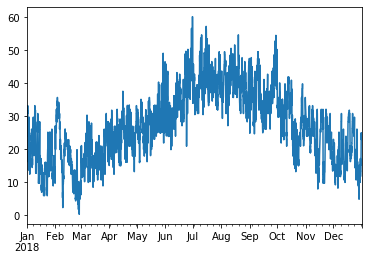

In [12]:
# Psychrometric test
a.run_psychrometrics()

a.enthalpy.plot()

In [10]:
# Sun position test
a.run_sunposition()

a.solar_altitude.plot()

'"Downloaded from Climate.Onebuilding.org -- Ground temps represent undisturbed earth temperatures - calculated from this weather data."'

In [19]:
# Preprocess

df = a.df

from climate.old import *

# Calculate local wind speed
df["WindSpeed2m"] = [wind_speed_at_height(ws=i, h1=10, h2=2) for i in df.wind_speed]
print("Wind speed calculated")

# Calculate the solar altitude/azimuth
df["SolarAltitude"] = [solar_altitude(a.latitude, a.longitude, i.year, i.month, i.day, i.hour, a.time_zone, i.minute, i.second) for i in df.index]
print("Sun altitudes calculated")
df["SolarAzimuth360"] = [solar_azimuth(a.latitude, a.longitude, i.year, i.month, i.day, i.hour, a.time_zone, i.minute, i.second) for i in df.index]
df["SolarAzimuth"] = [float(l) if float(l) < 180 else float(360-l) for l in df.SolarAzimuth360.values]
print("Sun azimuths calculated")

# Solar Adj MRT
df["SolarAdjustedMeanRadiantTemperature"] = df.apply(
    lambda x: solar_adjusted_mean_radiant_temperature(
        dry_bulb_temperature=x.dry_bulb_temperature, 
        direct_normal_radiation=x.direct_normal_radiation, 
        diffuse_horizontal_radiation=x.diffuse_horizontal_radiation, 
        global_horizontal_radiation=x.global_horizontal_radiation, 
        solar_altitude=x.SolarAltitude, 
        solar_azimuth=x.SolarAzimuth, 
        ground_reflectivity=0.3, 
        clothing_absorbtivity=0.7, 
        shading_transmissivity=1
    ), axis=1
)
print("SolarAdjustedMeanRadiantTemperature calculated")

# UTCI
df["UniversalThermalClimateIndex"] = df.apply(
    lambda x: universal_thermal_climate_index(
        air_temperature=x["dry_bulb_temperature"], 
        air_velocity=x["WindSpeed2m"],
        mean_radiant_temperature=x["SolarAdjustedMeanRadiantTemperature"],
        relative_humidity=x["relative_humidity"]
    ), 
    axis=1
)
print("UTCI calculated")

# Humidity ratio
df["HumidityRatio"] = df.apply(lambda x: humidity_ratio_relative_humidity(dry_bulb_temperature=x["dry_bulb_temperature"], relative_humidity=x["relative_humidity"]/100, pressure=x["atmospheric_station_pressure"]/1000), axis=1)
print("Humidity ratio calculated")

# Enthalpy
df["Enthalpy"] = df.apply(lambda x: enthalpy_relative_humidity(dry_bulb_temperature=x["dry_bulb_temperature"], relative_humidity=x["relative_humidity"]/100, pressure=x["atmospheric_station_pressure"]/1000), axis=1)
print("Enthalpy calculated")

# Wet-bulb temperature
df["WetBulbTemperature"] = df.apply(lambda x: wet_bulb_temperature_relative_humidity(dry_bulb_temperature=x["dry_bulb_temperature"], relative_humidity=x["relative_humidity"]/100, pressure=x["atmospheric_station_pressure"]/1000), axis=1)
print("WetBulb calculated")

df["City"] = a.city
df["Country"] = a.country
df["StationID"] = a.station_id

# Set the base folder
directory = "./Charts"

# Generate output directory
output_directory = generate_directory(os.path.join(directory, a.filepath.replace(".epw", "")))

Wind speed calculated
Sun altitudes calculated
Sun azimuths calculated
SolarAdjustedMeanRadiantTemperature calculated
UTCI calculated
Humidity ratio calculated
Enthalpy calculated
WetBulb calculated


In [5]:
bh = BuroHappold()
bh.colors["official"]["BrandGreen"]

rgb_to_hex(bh.colors["official"]["BrandGreen"])
rgb_to_hex([0.5, 0.5, 0.8])

'#7f7fcc'

In [20]:
from climate.old_plot import *

# Run the Psychrometric chart generator
psychrometric_chart(df, cm=gen_cmap([bh_colors["BH_DarkBlue"], bh_colors["BH_Orange"], bh_colors["BH_BrightRed"]], N=1000), close=True, savepath=os.path.join(output_directory, "Psychrometric.png"))

Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\Psychrometric.png


In [21]:
# Run some boring, generic heatmaps  
weather_heatmap(df, "global_horizontal_radiation", cmap=gen_cmap([[255, 255, 255], bh_colors["BH_Orange"]], N=500), savepath=os.path.join(output_directory, "GlobalHorizontalRadiation.png"), close=True)
weather_heatmap(df, "dry_bulb_temperature", cmap=gen_cmap([[255, 255, 255], bh_colors["BH_BrightRed"]], N=500), savepath=os.path.join(output_directory, "DryBulbTemperature.png"), close=True)
weather_heatmap(df, "relative_humidity", cmap=gen_cmap([bh_colors["BH_DarkBlue"], [255, 255, 255]], N=500, r=True), savepath=os.path.join(output_directory, "RelativeHumidity.png"), close=True)
weather_heatmap(df, "dew_point_temperature", cmap=gen_cmap([bh_colors["BH_Purple"], [255, 255, 255]], N=500, r=True), savepath=os.path.join(output_directory, "DewPointTemperature.png"), close=True)


Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\GlobalHorizontalRadiation.png
Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\DryBulbTemperature.png
Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\RelativeHumidity.png
Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\DewPointTemperature.png


In [22]:
# Run some more interesting UTCI frequency plots
utci_frequency(df, hours=['08:00', '22:00'], savepath=os.path.join(output_directory, "UTCI_histogram_0800_2200.png"), close=True)
utci_frequency(df, hours=['00:00', '23:59'], savepath=os.path.join(output_directory, "UTCI_histogram_0000_2359.png"), close=True)


Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\UTCI_histogram_0800_2200.png
Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\UTCI_histogram_0000_2359.png


In [23]:
# Run a nice, pretty UTCI heatmap
utci_heatmap(df, savepath=os.path.join(output_directory, "UTCI_heatmap.png"), close=True)

Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\UTCI_heatmap.png


In [24]:
_seasons = ["Annual", "Spring", "Summer", "Autumn", "Winter"]
_times = ["Daily"]

# Run some windroses per seaon and time period
for s in _seasons:
    for t in _times:
        windroset(df, seasonal_period=s, day_period=t, variable="wind_speed", cmap=gen_cmap([bh_colors["BH_Green"], bh_colors["BH_DarkBlue"], bh_colors["BH_DarkRed"]], N=500, r=False), cls=True, savepath=os.path.join(output_directory, "Windrose_{}_{}_{}.png".format(s, t, "WindSpeed")))


Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\Windrose_Annual_Daily_WindSpeed.png
Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\Windrose_Spring_Daily_WindSpeed.png
Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\Windrose_Summer_Daily_WindSpeed.png
Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\Windrose_Autumn_Daily_WindSpeed.png
Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\Windrose_Winter_Daily_WindSpeed.png


<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

Saving to C:\Users\tgerrish\Documents\GitHub\climate\tests\IRL_EM_Dublin.AP.039690_TMYx.2003-2017\Diurnal.png


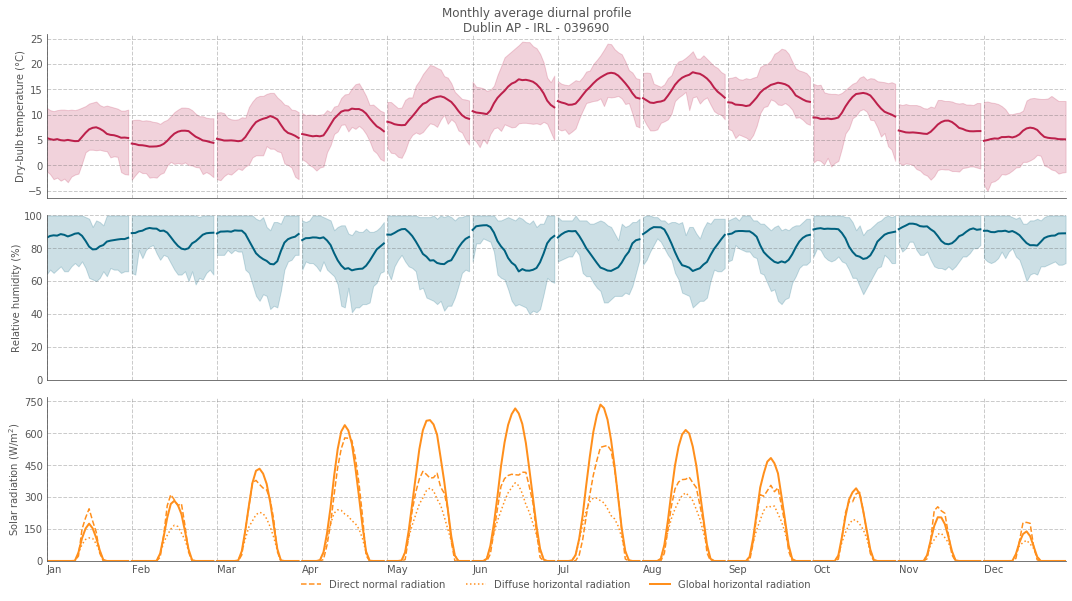

In [25]:
# Run a monthly diurnal summary plot
monthly_diurnal_plot(df, savepath=os.path.join(output_directory, "Diurnal.png"), close=True)

In [59]:
a.city.__ne__

<method-wrapper '__ne__' of str object at 0x0000019F63469870>

In [39]:
# pd.datetime.utcoffset()
pd.datetime.utcoffset
datetime.utcoffset(12)

TypeError: descriptor 'utcoffset' requires a 'datetime.datetime' object but received a 'int'

In [7]:
import pandas as pd
time_zone = 3.5
dti = pd.date_range(start="2018-01-01 00:00:00", end="2019-01-01 00:00:00", freq="60T", closed="left")

dti.tz_localize('UTC').tz_convert(int(0 * 60 * 60))

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00', '2018-01-01 03:00:00+00:00',
               '2018-01-01 04:00:00+00:00', '2018-01-01 05:00:00+00:00',
               '2018-01-01 06:00:00+00:00', '2018-01-01 07:00:00+00:00',
               '2018-01-01 08:00:00+00:00', '2018-01-01 09:00:00+00:00',
               ...
               '2018-12-31 14:00:00+00:00', '2018-12-31 15:00:00+00:00',
               '2018-12-31 16:00:00+00:00', '2018-12-31 17:00:00+00:00',
               '2018-12-31 18:00:00+00:00', '2018-12-31 19:00:00+00:00',
               '2018-12-31 20:00:00+00:00', '2018-12-31 21:00:00+00:00',
               '2018-12-31 22:00:00+00:00', '2018-12-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=8760, freq='60T')